<img src="../image/logo-cefet.png" width="300">

<h1> PPCIC Dissertação - 2021
    <br>
    <br>
    DETECÇÃO DE EVENTOS ADVERSOS ATRAVÉS DO TWITTER UTILIZANDO O METAMAP PARA O PORTUGUÊS DO BRASIL </h1>
</br>

<h2> Matéria: CIC1229 - TÓPICOS ESPECIAIS EM ALGORITMOS </h2>
<h2> Aluno: Perciliano </h2>
<h2> Orientadora: Kele Belloze </h2>
<h3> Data: 11/06/2021 </h3>

---

**Autor: Luiz Perciliano** - 
***luiz.perciliano@eic.cefet-rj.br***

- Dados da pesquisa na base SCOPUS dia 31-05-2021
 - String: "metamap" OR ("natural language processing" AND "pharmacovigilance") OR ("text mining" AND (pharmacovigilance OR "adverse event" OR "adverse effect"))
 - 574 artigos
- Download de dados da pesquisa do Qualis dia 06-06-2021
<br>
<br>

**Requisitos**
- RF01 - Analisar bases de dados
- RF02 - Mesclar bases para identificar estrato do artigo
- RF03 - Remover duplicatas
- RF03 - Identificar artigos para leitura de resumo e conclusão
- RF04 - Identificar artigos para leitura completa

<b>Site do projeto:</b> https:git.com
<br>
**Endereço da dissertação:** https://pt.overleaf.com/project/60731ca2bcfa0afce8ae0cd1

---

# Preparar Infraesrtutura

In [1]:
print(f'Importar as bibliotecas necessárias e mapear a pasta do projeto.')
import os, re
import sys
import pandas as pd
import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
from unidecode import unidecode
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Importar as bibliotecas necessárias e mapear a pasta do projeto.


In [2]:
data_inicio = pd.Timestamp.now()
print(data_inicio)

2021-06-10 11:24:38.137884


In [3]:
print(f'Lista do conteúdo da pasta ...')
os.listdir(os.path.join('..','data'))

Lista do conteúdo da pasta ...


['base-qualis-06-06-2021.xlsx',
 'classificacao_qualis_06-06-2021.xls',
 'requiremets.txt',
 'resultado_geral.xlsx',
 'resultado_geral_06-06-2021.xlsx',
 'resultado_scopus.xlsx',
 'scopus-31-05-2021.csv',
 'stop_word_projeto.csv',
 'stop_word_pt.csv']

In [4]:
os.listdir('../Image')

['logo-cefet.png', 'Logo_CVM.png', 'wordcloud.pdf']

## Verificar, atualizar e instalar se necessário python e módulos 

In [ ]:
## versao 3,9,0 estava funcionando
print('Local de instalação do Python:       ',sys.executable)
print('Versão do Python instalado e em uso: ',sys.version)
print('Informações da versão do Python:     ',sys.version_info)
print(f'Quantidade de CPU:                   {os.cpu_count()}')

In [ ]:
print('Atualizando os módulos Python.')
#!pip install --upgrade pip

In [ ]:
print('Local de instalação do Python:       ',sys.executable)
print('Versão do Python instalado e em uso: ',sys.version)
print('Informações da versão do Python:     ',sys.version_info)
print(f'Quantidade de CPU:                   {os.cpu_count()}')

In [ ]:
print('Instalando os módulos necessários.')
# print('')
#!pip install Unidecode -q
#!pip install sklearn
#!pip install wordcloud
#!pip install wget
#!pip install opencv-python #import cv2
#!pip install wand #wand=0.6.5
#!pip install jupyter_contrib_nbextensions
#!pip install pip-chill ## para verificar todos os mõdulos instalados para uma nova instalacao

# Preparar e carregar base de dados

## Conexão e consulta ao SQL Server

## Carregar Planilha - Base Qualis

In [5]:
print('Carregando pesquisa realizada na base Scopus.')
'''
Fonte: https://sucupira.capes.gov.br/sucupira/public/consultas/coleta/veiculoPublicacaoQualis/listaConsultaGeralPeriodicos.jsf
Periódico do quadriênio 2013-2016
'''
arquivo_base_qualis = os.path.join('../data','base-qualis-06-06-2021.xlsx')
raw_data_qualis = pd.read_excel(arquivo_base_qualis)
raw_data_qualis

Carregando pesquisa realizada na base Scopus.


,ISSN,Título,Área de Avaliação,Estrato
0,1981-030X,19&20 (RIO DE JANEIRO),"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",C
1,2236-6695,A BARRIGUDA: REVISTA CIENTÍFICA,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",B4
2,1413-6090,A ECONOMIA EM REVISTA,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",B4
3,1516-3210,A&C. REVISTA DE DIREITO ADMINISTRATIVO & CONST...,"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",B4
4,0001-3072,ABACUS (SYDNEY. PRINT),"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",A2
...,...,...,...,...
131269,1175-5326,ZOOTAXA (AUCKLAND. PRINT),ZOOTECNIA / RECURSOS PESQUEIROS ...,B1
131270,1175-5334,ZOOTAXA (ONLINE),ZOOTECNIA / RECURSOS PESQUEIROS ...,B1
131271,2358-3576,ZOOTECNIA,ZOOTECNIA / RECURSOS PESQUEIROS ...,C
131272,0798-7269,ZOOTECNIA TROPICAL - FONAIAP,ZOOTECNIA / RECURSOS PESQUEIROS ...,B3


## Carregar CSV - Busca Scopus

In [6]:
print('Visualização do dataframe carregado da base scopus.')
arquivo_base_scopus = os.path.join('../data','scopus-31-05-2021.csv')
raw_data_scopus = pd.read_csv(arquivo_base_scopus, sep=",", delimiter=None, encoding='utf-8')
raw_data_scopus.head()

Visualização do dataframe carregado da base scopus.


,Authors,Author(s) ID,Title,Year,Source title,Volume,Issue,Art. No.,Page start,Page end,...,ISBN,CODEN,PubMed ID,Language of Original Document,Abbreviated Source Title,Document Type,Publication Stage,Open Access,Source,EID
0,Bodenreider O.,6603893164;,The Unified Medical Language System (UMLS): In...,2004,Nucleic Acids Research,32,DATABASE ISS.,NaN,D267,D270,...,NaN,NARHA,14681409.0,English,Nucleic Acids Res.,Article,Final,"All Open Access, Bronze, Green",Scopus,2-s2.0-0345863927
1,Aronson A.R.,17933416200;,Effective mapping of biomedical text to the UM...,2001,Proceedings / AMIA ... Annual Symposium. AMIA ...,NaN,NaN,NaN,17,21,...,NaN,NaN,11825149.0,English,Proc AMIA Symp,Article,Final,NaN,Scopus,2-s2.0-0035752429
2,"Aronson A.R., Lang F.-M.",17933416200;13612282900;,An overview of MetaMap: Historical perspective...,2010,Journal of the American Medical Informatics As...,17,3,NaN,229,236,...,NaN,JAMAF,20442139.0,English,J. Am. Med. Informatics Assoc.,Article,Final,"All Open Access, Bronze, Green",Scopus,2-s2.0-77955287813
3,"Piñero J., Bravo A., Queralt-Rosinach N., Guti...",55220852900;56374942700;35766634600;5672880770...,DisGeNET: A comprehensive platform integrating...,2017,Nucleic Acids Research,45,D1,NaN,D833,D839,...,NaN,NARHA,27924018.0,English,Nucleic Acids Res.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85016126262
4,"Nikfarjam A., Sarker A., O'Connor k., Ginn R.,...",36069663700;36976315000;56596185000;5659652430...,Pharmacovigilance from social media: Mining ad...,2015,Journal of the American Medical Informatics As...,22,3,NaN,671,681,...,NaN,JAMAF,25755127.0,English,J. Am. Med. Informatics Assoc.,Article,Final,"All Open Access, Bronze, Green",Scopus,2-s2.0-84927943705


In [108]:
print('Carga e Visualização do dataframe')
arquivo_base_scopus = os.path.join('../data','pubmed-10-06-2021.csv')
raw_data_pubmed = pd.read_csv(arquivo_base_scopus, sep=",", delimiter=None, encoding='utf-8')
raw_data_pubmed.head()

Carga e Visualização do dataframe


,PMID,Title,Authors,Citation,First Author,Journal/Book,Publication Year,Create Date,PMCID,NIHMS ID,DOI
0,30649735,Overview of the First Natural Language Process...,"Jagannatha A, Liu F, Liu W, Yu H.",Drug Saf. 2019 Jan;42(1):99-111. doi: 10.1007/...,Jagannatha A,Drug Saf,2019,2019/01/17,PMC6860017,NIHMS1518894,10.1007/s40264-018-0762-z
1,33245290,Identification of Adverse Drug Event-Related J...,"Ujiie S, Yada S, Wakamiya S, Aramaki E.",JMIR Med Inform. 2020 Nov 27;8(11):e22661. doi...,Ujiie S,JMIR Med Inform,2020,2020/11/27,PMC7732716,NaN,10.2196/22661
2,31630063,A systematic review of natural language proces...,"Young IJB, Luz S, Lone N.",Int J Med Inform. 2019 Dec;132:103971. doi: 10...,Young IJB,Int J Med Inform,2019,2019/10/21,NaN,NaN,10.1016/j.ijmedinf.2019.103971
3,33278631,Natural language processing with deep learning...,"Borjali A, Magnéli M, Shin D, Malchau H, Murat...",Comput Biol Med. 2021 Feb;129:104140. doi: 10....,Borjali A,Comput Biol Med,2021,2020/12/05,NaN,NaN,10.1016/j.compbiomed.2020.104140
4,26394725,Can Natural Language Processing Improve the Ef...,"Baer B, Nguyen M, Woo EJ, Winiecki S, Scott J,...",Methods Inf Med. 2016;55(2):144-50. doi: 10.34...,Baer B,Methods Inf Med,2016,2015/09/24,NaN,NaN,10.3414/ME14-01-0066


In [ ]:
### https://www.gov.br/capes/pt-br

## Analisar dados brutos original

### Analisando base SCOPUS

In [7]:
#pd.set_option("max_colwidth", 100)

In [8]:
print('Verificando tipos e se tem dados nulos')
raw_data_scopus.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        574 non-null    object 
 1   Author(s) ID                   574 non-null    object 
 2   Title                          574 non-null    object 
 3   Year                           574 non-null    int64  
 4   Source title                   574 non-null    object 
 5   Volume                         481 non-null    object 
 6   Issue                          242 non-null    object 
 7   Art. No.                       154 non-null    object 
 8   Page start                     420 non-null    object 
 9   Page end                       410 non-null    object 
 10  Page count                     6 non-null      float64
 11  Cited by                       448 non-null    float64
 12  DOI        

In [9]:
raw_data_scopus.nunique()

Authors                          549
Author(s) ID                     546
Title                            572
Year                              25
Source title                     220
Volume                           208
Issue                             39
Art. No.                         147
Page start                       340
Page end                         342
Page count                         5
Cited by                          81
DOI                              459
Link                             574
Affiliations                     552
Authors with affiliations        567
Abstract                         565
Author Keywords                  394
Index Keywords                   520
Molecular Sequence Numbers         1
Chemicals/CAS                     94
Tradenames                        16
Manufacturers                      2
Funding Details                  228
Funding Text 1                   187
Funding Text 2                    18
Funding Text 3                     2
R

In [10]:
# verificar campos nulos
raw_data_scopus.isnull().sum()

Authors                            0
Author(s) ID                       0
Title                              0
Year                               0
Source title                       0
Volume                            93
Issue                            332
Art. No.                         420
Page start                       154
Page end                         164
Page count                       568
Cited by                         126
DOI                              115
Link                               0
Affiliations                       7
Authors with affiliations          3
Abstract                           0
Author Keywords                  178
Index Keywords                    54
Molecular Sequence Numbers       573
Chemicals/CAS                    466
Tradenames                       554
Manufacturers                    572
Funding Details                  334
Funding Text 1                   386
Funding Text 2                   556
Funding Text 3                   572
R

### Analisando base Qualis

In [11]:
print('Verificando tipos e se tem dados nulos')
raw_data_qualis.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131274 entries, 0 to 131273
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISSN               131271 non-null  object
 1   Título             131274 non-null  object
 2   Área de Avaliação  131274 non-null  object
 3   Estrato            131274 non-null  object
dtypes: object(4)
memory usage: 4.0+ MB


In [12]:
raw_data_qualis.nunique()

ISSN                 27618
Título               29838
Área de Avaliação       49
Estrato                  8
dtype: int64

In [13]:
raw_data_qualis.isnull().sum()

ISSN                 3
Título               0
Área de Avaliação    0
Estrato              0
dtype: int64

## Copiar dataframe para ajustes

In [14]:
df_scopus = raw_data_scopus.copy()
df_qualis = raw_data_qualis.copy()

In [15]:
## Verificar se os dataframes nao s"ao espelhos
print(id(df_scopus),id(df_qualis), id(raw_data_scopus),id(raw_data_qualis))

2504434480840 2504503299144 2504503065544 2504500494536


# Dataframe SCOPUS

## Ajustar de Colunas

### Alterar nome de Colunas - SCOPUS

In [16]:
print('Verificar colunas')
df_scopus.columns

Verificar colunas


Index(['Authors', 'Author(s) ID', 'Title', 'Year', 'Source title', 'Volume',
       'Issue', 'Art. No.', 'Page start', 'Page end', 'Page count', 'Cited by',
       'DOI', 'Link', 'Affiliations', 'Authors with affiliations', 'Abstract',
       'Author Keywords', 'Index Keywords', 'Molecular Sequence Numbers',
       'Chemicals/CAS', 'Tradenames', 'Manufacturers', 'Funding Details',
       'Funding Text 1', 'Funding Text 2', 'Funding Text 3', 'References',
       'Correspondence Address', 'Editors', 'Sponsors', 'Publisher',
       'Conference name', 'Conference date', 'Conference location',
       'Conference code', 'ISSN', 'ISBN', 'CODEN', 'PubMed ID',
       'Language of Original Document', 'Abbreviated Source Title',
       'Document Type', 'Publication Stage', 'Open Access', 'Source', 'EID'],
      dtype='object')

In [17]:
columns_scopus = {
    'Authors':'autores',
    'Author(s) ID':'id_autores',
    'Title':'titulo_artigo',
    'Year':'ano',
    'Source title':'titulo_fonte',
    'Volume':'volume',
    'Issue':'publicado',
    'Art. No.':'numero_artigo',
    'Page start':'inicio_pagina',
    'Page end':'fim_pagina', 
    'Page count':'quantidade_paginas',
    'Cited by':'quantidade_citacoes',
    'DOI':'doi',
    'Link':'link_scopus',
    'Affiliations':'afiliacoes',
    'Authors with affiliations':'autores_com_filiacoes',
    'Abstract':'resumo',
    'Author Keywords':'palavras_chaves_autor',
    'Index Keywords':'palavras_chave_index',
    'Molecular Sequence Numbers':'numeros_sequencia_molecular' ,
    'Chemicals/CAS':'chemicals_cas',
    'Tradenames':'nomes_comerciais',
    'Manufacturers':'fabricantes',
    'Funding Details':'detalhes_financiamento',
    'Funding Text 1':'texto_financiamento_1',
    'Funding Text 2':'texto_financiamento_2',
    'Funding Text 3':'texto_financiamento_3',
    'References':'referencias',
    'Correspondence Address':'endereco_correspondencia',
    'Editors':'editores',
    'Sponsors':'patrocinadores',
    'Publisher':'editor',
    'Conference name':'nome_conferencia',
    'Conference date':'data_conferencia',
    'Conference location':'local_conferencia',
    'Conference code':'codigo_conferencia',
    'ISSN':'issn_scopus',
    'ISBN':'isbn',
    'CODEN':'coden',
    'PubMed ID':'id_pubmed',
    'Language of Original Document':'idioma_original',
    'Abbreviated Source Title':'titulo_abreviado_fonte',
    'Document Type':'tipo_documento',
    'Publication Stage':'etapa_publicacao',
    'Open Access':'acesso_livre',
    'Source':'fonte',
    'EID':'eid',
}

In [18]:
df_scopus = df_scopus.rename(columns=columns_scopus)
df_scopus.head(1)

,autores,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,isbn,coden,id_pubmed,idioma_original,titulo_abreviado_fonte,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid
0,Bodenreider O.,6603893164;,The Unified Medical Language System (UMLS): In...,2004,Nucleic Acids Research,32,DATABASE ISS.,NaN,D267,D270,...,NaN,NARHA,14681409.0,English,Nucleic Acids Res.,Article,Final,"All Open Access, Bronze, Green",Scopus,2-s2.0-0345863927


### Ajustar Colunas de Páginas

In [19]:
df_scopus["inicio_pagina_"] = df_scopus["inicio_pagina"]
df_scopus["fim_pagina_"] = df_scopus["fim_pagina"]

In [20]:
## Expressao que pega só dígitos
r = re.compile(r'\D')

In [21]:
df_scopus.loc[df_scopus['quantidade_citacoes'] == 1912] [['issn_scopus','inicio_pagina','fim_pagina']]

,issn_scopus,inicio_pagina,fim_pagina
0,03051048,D267,D270


In [22]:
df_scopus.loc[[0,1,2,513], ['inicio_pagina','fim_pagina','quantidade_paginas']]

,inicio_pagina,fim_pagina,quantidade_paginas
0,D267,D270,NaN
1,17,21,NaN
2,229,236,NaN
513,NaN,NaN,837.0


In [23]:
## Criar novas colunas de paginas e + uma para calcular qtde paginas

In [24]:
df_scopus.inicio_pagina_.replace(r, '', regex = True, inplace=True)
df_scopus.fim_pagina_.replace(r, '', regex = True, inplace=True)

In [25]:
df_scopus.loc[[0,1,2,513], ['inicio_pagina','fim_pagina','quantidade_paginas','inicio_pagina_','fim_pagina_']]

,inicio_pagina,fim_pagina,quantidade_paginas,inicio_pagina_,fim_pagina_
0,D267,D270,NaN,267,270
1,17,21,NaN,17,21
2,229,236,NaN,229,236
513,NaN,NaN,837.0,NaN,NaN


In [26]:
print('Ajustar tipagem dos dados')
df_scopus['inicio_pagina_'] = df_scopus['inicio_pagina_'].astype('float64')
df_scopus['fim_pagina_'] = df_scopus['fim_pagina_'].astype('float64')

Ajustar tipagem dos dados


In [27]:
df_scopus['quantidade_paginas_'] = df_scopus['fim_pagina_'] - df_scopus['inicio_pagina_']

In [28]:
df_scopus.loc[[0,1,2,513], ['inicio_pagina','fim_pagina','quantidade_paginas','inicio_pagina_','fim_pagina_','quantidade_paginas_']]

,inicio_pagina,fim_pagina,quantidade_paginas,inicio_pagina_,fim_pagina_,quantidade_paginas_
0,D267,D270,NaN,267.0,270.0,3.0
1,17,21,NaN,17.0,21.0,4.0
2,229,236,NaN,229.0,236.0,7.0
513,NaN,NaN,837.0,NaN,NaN,NaN


In [29]:
df_scopus.sort_values('quantidade_paginas_',ascending=False, )[['issn_scopus','quantidade_paginas_']]

,issn_scopus,quantidade_paginas_
410,01492918,8836.0
192,NaN,60.0
320,09534814,30.0
480,13673270,26.0
502,18650929,26.0
...,...,...
562,NaN,NaN
564,16130073,NaN
566,1942597X,NaN
568,1048776X,NaN


In [30]:
## Pegar documentos com paginas nao nulas menor q 3 páginas

### Criar nova coluna com data de conferencia

In [31]:
# tratar data - criar novo campo de data
df_scopus['data_conferencia']

0                                              NaN
1                                              NaN
2                                              NaN
3                                              NaN
4                                              NaN
                          ...                     
569    21 September 2005 through 23 September 2005
570                                            NaN
571                                            NaN
572        13 October 1999 through 15 October 1999
573        7 November 1990 through 8 November 1990
Name: data_conferencia, Length: 574, dtype: object

## Ajustar tipagem de dados

### Convertendo as colunas de datas para o formato datetime

### Convertendo as colunas para categóricas

In [32]:
print('Ajustar tipagem dos dados')
df_scopus['fabricantes'] = df_scopus['fabricantes'].astype('category')
df_scopus['acesso_livre'] = df_scopus['acesso_livre'].astype('category')

Ajustar tipagem dos dados


## Filtrar dataframe

In [111]:
df_scopus.head()

,autores,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,idioma_original,titulo_abreviado_fonte,tipo_documento,etapa_publicacao,acesso_livre,fonte,eid,inicio_pagina_,fim_pagina_,quantidade_paginas_
0,Bodenreider O.,6603893164;,The Unified Medical Language System (UMLS): In...,2004,Nucleic Acids Research,32,DATABASE ISS.,NaN,D267,D270,...,English,Nucleic Acids Res.,Article,Final,"All Open Access, Bronze, Green",Scopus,2-s2.0-0345863927,267.0,270.0,3.0
1,Aronson A.R.,17933416200;,Effective mapping of biomedical text to the UM...,2001,Proceedings / AMIA ... Annual Symposium. AMIA ...,NaN,NaN,NaN,17,21,...,English,Proc AMIA Symp,Article,Final,NaN,Scopus,2-s2.0-0035752429,17.0,21.0,4.0
2,"Aronson A.R., Lang F.-M.",17933416200;13612282900;,An overview of MetaMap: Historical perspective...,2010,Journal of the American Medical Informatics As...,17,3,NaN,229,236,...,English,J. Am. Med. Informatics Assoc.,Article,Final,"All Open Access, Bronze, Green",Scopus,2-s2.0-77955287813,229.0,236.0,7.0
3,"Piñero J., Bravo A., Queralt-Rosinach N., Guti...",55220852900;56374942700;35766634600;5672880770...,DisGeNET: A comprehensive platform integrating...,2017,Nucleic Acids Research,45,D1,NaN,D833,D839,...,English,Nucleic Acids Res.,Article,Final,"All Open Access, Gold, Green",Scopus,2-s2.0-85016126262,833.0,839.0,6.0
4,"Nikfarjam A., Sarker A., O'Connor k., Ginn R.,...",36069663700;36976315000;56596185000;5659652430...,Pharmacovigilance from social media: Mining ad...,2015,Journal of the American Medical Informatics As...,22,3,NaN,671,681,...,English,J. Am. Med. Informatics Assoc.,Article,Final,"All Open Access, Bronze, Green",Scopus,2-s2.0-84927943705,671.0,681.0,10.0


## Analisar dataframe tratado

In [33]:
print('Verificando tipos e se tem dados nulos')
df_scopus.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 50 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   autores                      574 non-null    object  
 1   id_autores                   574 non-null    object  
 2   titulo_artigo                574 non-null    object  
 3   ano                          574 non-null    int64   
 4   titulo_fonte                 574 non-null    object  
 5   volume                       481 non-null    object  
 6   publicado                    242 non-null    object  
 7   numero_artigo                154 non-null    object  
 8   inicio_pagina                420 non-null    object  
 9   fim_pagina                   410 non-null    object  
 10  quantidade_paginas           6 non-null      float64 
 11  quantidade_citacoes          448 non-null    float64 
 12  doi                      

In [34]:
### analisar estes números máximos e mínimos ?????????
print('Resumo Estatístico de Campos Numéricos')
df_scopus.describe()

Resumo Estatístico de Campos Numéricos


,ano,quantidade_paginas,quantidade_citacoes,codigo_conferencia,id_pubmed,inicio_pagina_,fim_pagina_,quantidade_paginas_
count,574.000000,6.000000,448.000000,193.000000,3.140000e+02,420.000000,410.000000,410.000000
mean,2014.632404,158.666667,28.962054,126570.849741,2.599832e+07,566.923810,589.000000,29.441463
std,4.584182,334.274538,119.388752,39969.995470,5.110147e+06,889.455044,1005.929372,436.016534
min,1991.000000,2.000000,1.000000,14685.000000,8.947691e+06,1.000000,2.000000,1.000000
25%,2012.000000,2.750000,3.000000,102305.000000,2.295241e+07,123.750000,132.000000,5.000000
50%,2015.000000,8.000000,8.000000,117981.000000,2.637784e+07,371.500000,371.000000,7.000000
75%,2018.000000,74.000000,23.000000,140679.000000,3.024264e+07,737.000000,706.750000,10.000000
max,2021.000000,837.000000,1912.000000,253829.000000,3.393644e+07,13350.000000,13355.000000,8836.000000


In [35]:
# ver qtd no excel =NÚM.CARACT(O2)
print('Coluna com maior qtde de caracteres')
df_scopus['titulo_artigo'].apply(str).map(len).max()

Coluna com maior qtde de caracteres


319

In [36]:
# analisar alguns campos

In [37]:
## tirar os espaços das colunas strings a serem trabalhadas

## Visualizações

### Analisando tipos de acessos dos arquivos

In [38]:
## pegar os 10 + patrocinadores
df_scopus.acesso_livre.unique()

['All Open Access, Bronze, Green', NaN, 'All Open Access, Gold, Green', 'All Open Access, Hybrid Gold, Green', 'All Open Access, Green', 'All Open Access, Bronze', 'All Open Access, Hybrid Gold', 'All Open Access, Gold']
Categories (7, object): ['All Open Access, Bronze, Green', 'All Open Access, Gold, Green', 'All Open Access, Hybrid Gold, Green', 'All Open Access, Green', 'All Open Access, Bronze', 'All Open Access, Hybrid Gold', 'All Open Access, Gold']

In [39]:
# Groupby by
acesso_livre = df_scopus.groupby("acesso_livre")

# Summary statistic of all
acesso_livre.describe().head()

ano                                         \
                               count         mean       std     min     25%   
acesso_livre                                                                  
All Open Access, Bronze         21.0  2016.380952  2.060975  2014.0  2015.0   
All Open Access, Bronze, Green  46.0  2013.630435  3.573723  2003.0  2012.0   
All Open Access, Gold            4.0  2019.500000  0.577350  2019.0  2019.0   
All Open Access, Gold, Green    94.0  2016.244681  3.339842  2006.0  2014.0   
All Open Access, Green          54.0  2013.925926  4.321302  2005.0  2010.0   

                                                        quantidade_paginas  \
                                   50%      75%     max              count   
acesso_livre                                                                 
All Open Access, Bronze         2016.0  2019.00  2019.0                0.0   
All Open Access, Bronze, Green  2014.0  2017.00  2019.0                0.0   
All Open Access, Gold           2019.5  2020.00  2020.0                0.0   
All Open Access, Gold, Green    2017.0  2019.00  2021.0                0.0   
All Open Access, Green          2013.5  2017.75  2021.0                0.0   

                                     ... fim_pagina_          \
                               mean  ...         75%     max   
acesso_livre                         ...                       
All Open Access, Bronze         NaN  ...       339.5  1426.0   
All Open Access, Bronze, Green  NaN  ...       886.0  2917.0   
All Open Access, Gold           NaN  ...       120.0   120.0   
All Open Access, Gold, Green    NaN  ...       751.5  1117.0   
All Open Access, Green          NaN  ...       702.0  2066.0   

                               quantidade_paginas_                           \
                                             count      mean       std  min   
acesso_livre                                                                  
All Open Access, Bronze                       16.0  9.250000  3.974921  3.0   
All Open Access, Bronze, Green                45.0  7.844444  3.470365  2.0   
All Open Access, Gold                          1.0  3.000000       NaN  3.0   
All Open Access, Gold, Green                  10.0  6.300000  2.584140  3.0   
All Open Access, Green                        50.0  9.100000  5.167599  1.0   

                                                       
                                 25%  50%   75%   max  
acesso_livre                                           
All Open Access, Bronze         6.75  8.5  12.0  18.0  
All Open Access, Bronze, Green  6.00  7.0   9.0  17.0  
All Open Access, Gold           3.00  3.0   3.0   3.0  
All Open Access, Gold, Green    4.25  6.5   7.0  12.0  
All Open Access, Green          6.25  8.0  11.0  30.0  

[5 rows x 64 columns]

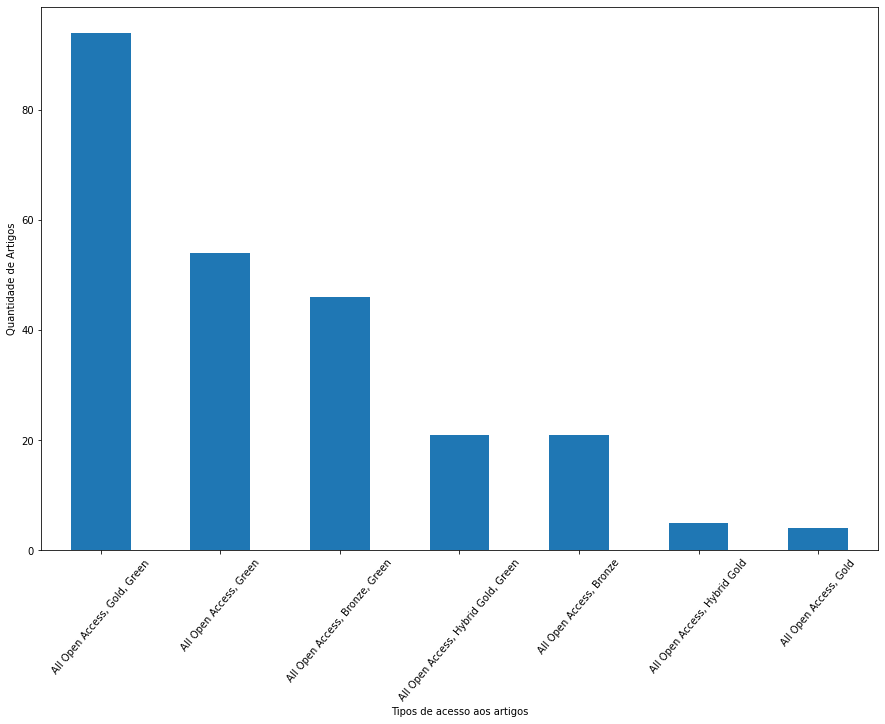

In [40]:
# pegar as 10 +
plt.figure(figsize=(15,10))
acesso_livre.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Tipos de acesso aos artigos")
plt.ylabel("Quantidade de Artigos")
plt.show()

### Analisando tipos de documentos

In [41]:
# Groupby by
tipo_documento = df_scopus.groupby("tipo_documento")

# Summary statistic of all
tipo_documento.describe().head()

ano                                                  \
                   count         mean       std     min      25%     50%   
tipo_documento                                                             
Article            323.0  2014.770898  4.659541  1996.0  2012.00  2016.0   
Book Chapter         9.0  2016.444444  3.811532  2009.0  2014.00  2017.0   
Conference Paper   208.0  2014.096154  4.509827  1991.0  2012.00  2014.0   
Conference Review    2.0  2014.500000  3.535534  2012.0  2013.25  2014.5   
Editorial            4.0  2016.500000  3.696846  2012.0  2014.25  2017.0   

                                   quantidade_paginas         ... fim_pagina_  \
                       75%     max              count   mean  ...         75%   
tipo_documento                                                ...               
Article            2018.00  2021.0                1.0    2.0  ...       766.0   
Book Chapter       2019.00  2021.0                0.0    NaN  ...       228.5   
Conference Paper   2018.00  2021.0                3.0    6.0  ...       674.0   
Conference Review  2015.75  2017.0                2.0  466.0  ...         NaN   
Editorial          2019.25  2020.0                0.0    NaN  ...       194.0   

                           quantidade_paginas_                              \
                       max               count       mean         std  min   
tipo_documento                                                               
Article             9808.0               220.0  48.759091  595.154967  1.0   
Book Chapter        1000.0                 8.0  17.375000   18.220377  4.0   
Conference Paper   13355.0               158.0   6.443038    3.564678  1.0   
Conference Review      NaN                 0.0        NaN         NaN  NaN   
Editorial            291.0                 3.0   2.000000    1.000000  1.0   

                                            
                   25%   50%   75%     max  
tipo_documento                              
Article            6.0   8.0  11.0  8836.0  
Book Chapter       8.5  10.5  16.5    60.0  
Conference Paper   4.0   5.0   9.0    26.0  
Conference Review  NaN   NaN   NaN     NaN  
Editorial          1.5   2.0   2.5     3.0  

[5 rows x 64 columns]

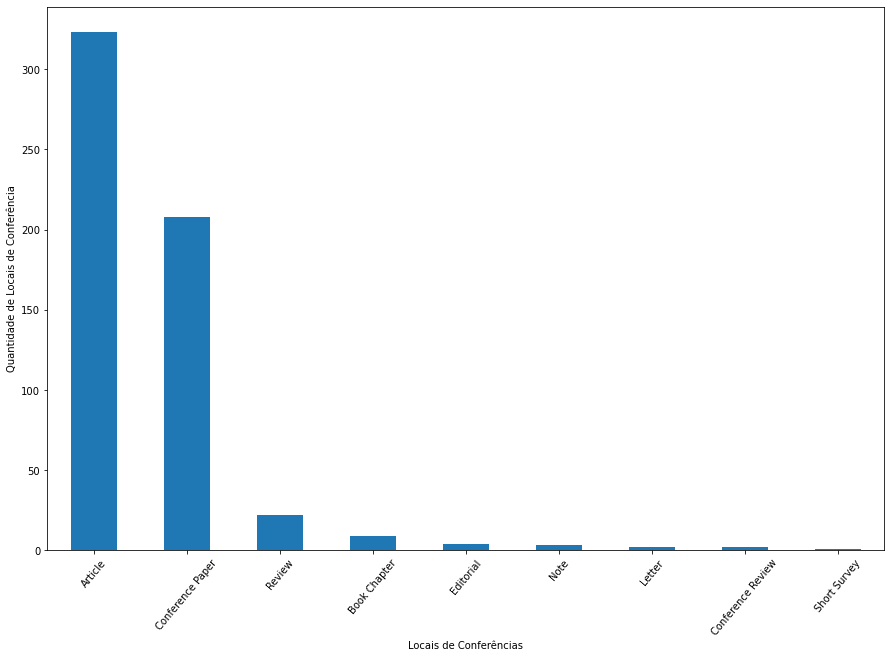

In [42]:
# pegar as 10 +
plt.figure(figsize=(15,10))
tipo_documento.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Locais de Conferências")
plt.ylabel("Quantidade de Locais de Conferência")
plt.show()

### Analisando Locais de Conferencia

In [43]:
# Groupby by
local_conferencia = df_scopus.groupby("local_conferencia")

# Summary statistic of all
local_conferencia.describe().head()

ano                                                      \
                  count    mean std     min     25%     50%     75%     max   
local_conferencia                                                             
Amman               1.0  2011.0 NaN  2011.0  2011.0  2011.0  2011.0  2011.0   
Amsterdam           1.0  2007.0 NaN  2007.0  2007.0  2007.0  2007.0  2007.0   
Arlington, VA       1.0  2010.0 NaN  2010.0  2010.0  2010.0  2010.0  2010.0   
Barcelona           1.0  2013.0 NaN  2013.0  2013.0  2013.0  2013.0  2013.0   
Beijing             1.0  2012.0 NaN  2012.0  2012.0  2012.0  2012.0  2012.0   

                  quantidade_paginas       ... fim_pagina_         \
                               count mean  ...         75%    max   
local_conferencia                          ...                      
Amman                            0.0  NaN  ...         NaN    NaN   
Amsterdam                        0.0  NaN  ...       246.0  246.0   
Arlington, VA                    0.0  NaN  ...       757.0  757.0   
Barcelona                        0.0  NaN  ...       166.0  166.0   
Beijing                          0.0  NaN  ...       172.0  172.0   

                  quantidade_paginas_                                    
                                count mean std  min  25%  50%  75%  max  
local_conferencia                                                        
Amman                             0.0  NaN NaN  NaN  NaN  NaN  NaN  NaN  
Amsterdam                         1.0  4.0 NaN  4.0  4.0  4.0  4.0  4.0  
Arlington, VA                     1.0  6.0 NaN  6.0  6.0  6.0  6.0  6.0  
Barcelona                         1.0  5.0 NaN  5.0  5.0  5.0  5.0  5.0  
Beijing                           1.0  8.0 NaN  8.0  8.0  8.0  8.0  8.0  

[5 rows x 64 columns]

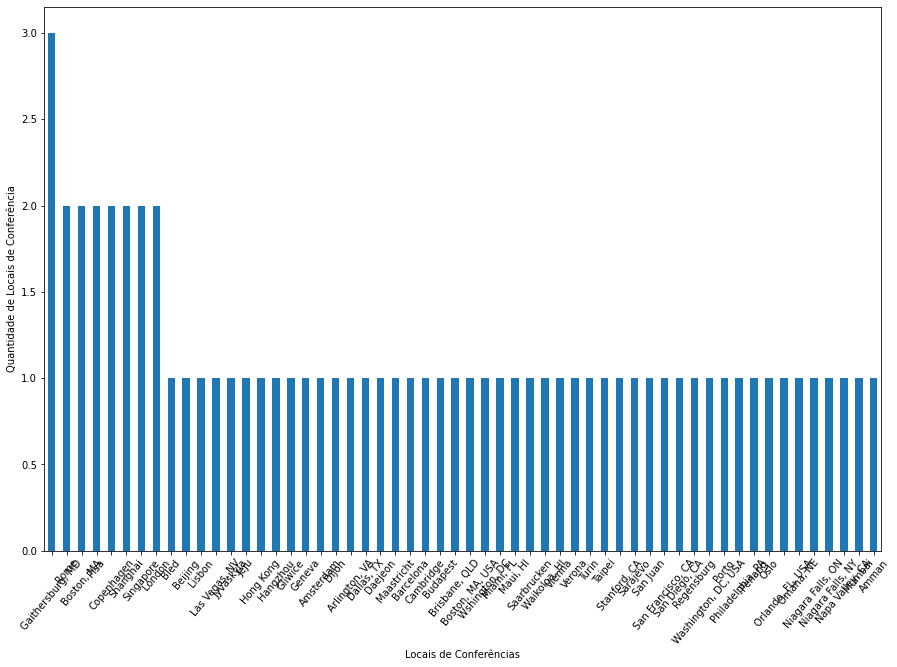

In [44]:
# pegar as 10 +
plt.figure(figsize=(15,10))
local_conferencia.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Locais de Conferências")
plt.ylabel("Quantidade de Locais de Conferência")
plt.show()

### Analisando Editores

In [45]:
# Groupby by
editor = df_scopus.groupby("editor")

# Summary statistic of all
editor.describe().head()

ano               \
                                                   count         mean   
editor                                                                  
Academic Press Inc.                                 35.0  2016.857143   
Adis                                                 4.0  2020.250000   
American Medical Association                         1.0  2019.000000   
American Society for Clinical Pharmacology and ...   1.0  2018.000000   
American Society for Engineering Management          1.0  2019.000000   

                                                                               \
                                                         std     min      25%   
editor                                                                          
Academic Press Inc.                                 2.116363  2014.0  2015.00   
Adis                                                0.957427  2019.0  2019.75   
American Medical Association                             NaN  2019.0  2019.00   
American Society for Clinical Pharmacology and ...       NaN  2018.0  2018.00   
American Society for Engineering Management              NaN  2019.0  2019.00   

                                                                            \
                                                       50%     75%     max   
editor                                                                       
Academic Press Inc.                                 2017.0  2019.0  2021.0   
Adis                                                2020.5  2021.0  2021.0   
American Medical Association                        2019.0  2019.0  2019.0   
American Society for Clinical Pharmacology and ...  2018.0  2018.0  2018.0   
American Society for Engineering Management         2019.0  2019.0  2019.0   

                                                   quantidade_paginas       \
                                                                count mean   
editor                                                                       
Academic Press Inc.                                               0.0  NaN   
Adis                                                              0.0  NaN   
American Medical Association                                      0.0  NaN   
American Society for Clinical Pharmacology and ...                0.0  NaN   
American Society for Engineering Management                       0.0  NaN   

                                                    ... fim_pagina_         \
                                                    ...         75%    max   
editor                                              ...                      
Academic Press Inc.                                 ...      279.00  362.0   
Adis                                                ...      619.25  785.0   
American Medical Association                        ...         NaN    NaN   
American Society for Clinical Pharmacology and ...  ...      102.00  102.0   
American Society for Engineering Management         ...         NaN    NaN   

                                                   quantidade_paginas_  \
                                                                 count   
editor                                                                   
Academic Press Inc.                                               26.0   
Adis                                                               4.0   
American Medical Association                                       0.0   
American Society for Clinical Pharmacology and ...                 1.0   
American Society for Engineering Management                        0.0   

                                                                               \
                                                         mean       std   min   
editor                                                                          
Academic Press Inc.                                 10.192308  3.600214   3.0   
Adis                       

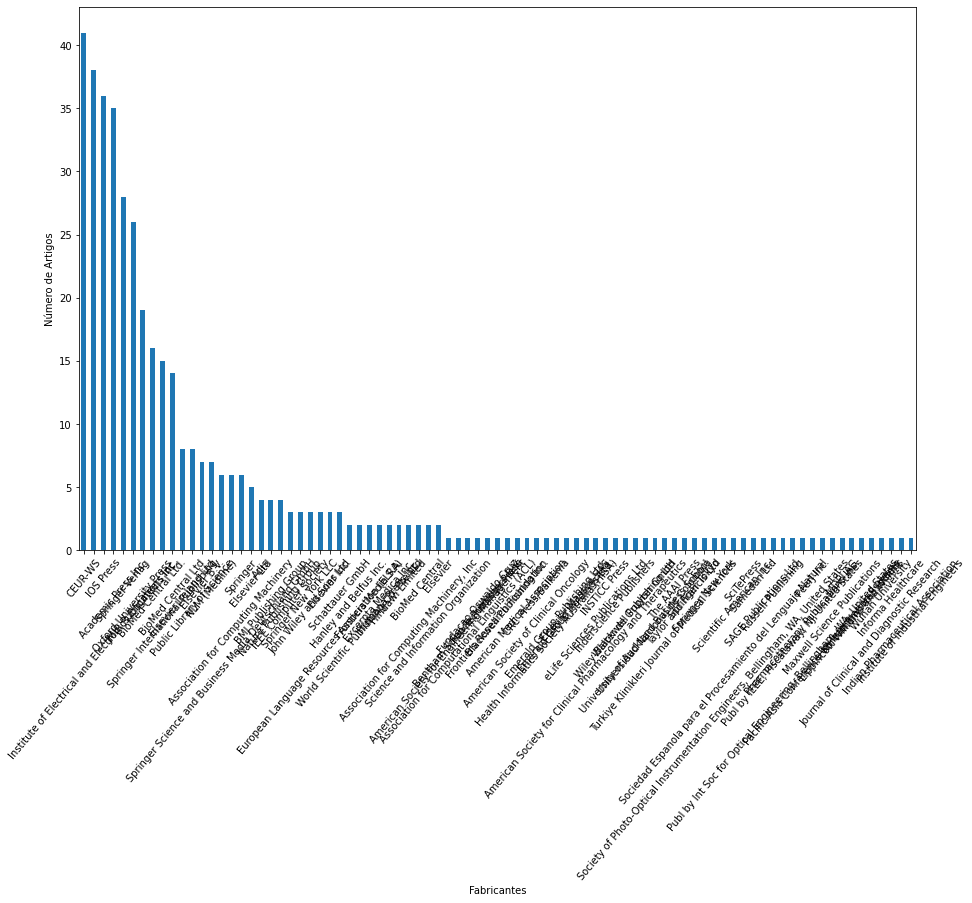

In [46]:
plt.figure(figsize=(15,10))
editor.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Fabricantes")
plt.ylabel("Número de Artigos")
plt.show()

### Analisando artigos por Ano

In [47]:
# Groupby by
ano = df_scopus.groupby("ano")

# Summary statistic of all
ano.describe().head()

quantidade_paginas                              quantidade_citacoes  \
                  count mean std min 25% 50% 75% max               count   
ano                                                                        
1991                0.0  NaN NaN NaN NaN NaN NaN NaN                 1.0   
1996                0.0  NaN NaN NaN NaN NaN NaN NaN                 1.0   
1997                0.0  NaN NaN NaN NaN NaN NaN NaN                 1.0   
1999                0.0  NaN NaN NaN NaN NaN NaN NaN                 1.0   
2000                0.0  NaN NaN NaN NaN NaN NaN NaN                 0.0   

            ... fim_pagina_         quantidade_paginas_                        \
      mean  ...         75%     max               count  mean       std   min   
ano         ...                                                                 
1991   1.0  ...       809.0  1047.0                 2.0   5.0  5.656854   1.0   
1996  20.0  ...       377.0   377.0                 1.0   4.0       NaN   4.0   
1997  69.0  ...       489.0   489.0                 1.0   4.0       NaN   4.0   
1999   1.0  ...       312.0   312.0                 1.0  15.0       NaN  15.0   
2000   NaN  ...       182.0   182.0                 1.0   9.0       NaN   9.0   

                              
       25%   50%   75%   max  
ano                           
1991   3.0   5.0   7.0   9.0  
1996   4.0   4.0   4.0   4.0  
1997   4.0   4.0   4.0   4.0  
1999  15.0  15.0  15.0  15.0  
2000   9.0   9.0   9.0   9.0  

[5 rows x 56 columns]

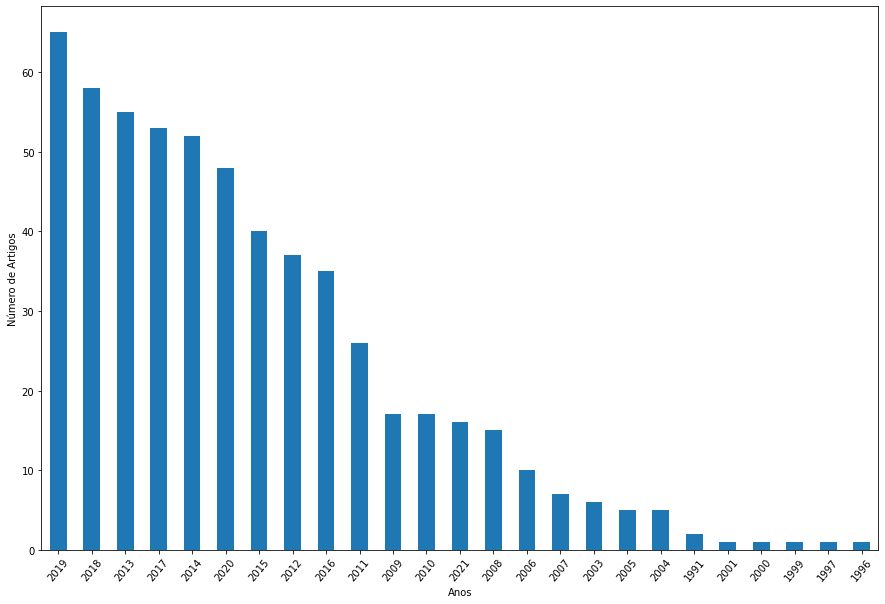

In [48]:
plt.figure(figsize=(15,10))
ano.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Anos")
plt.ylabel("Número de Artigos")
plt.show()

### Analisando os idiomas

In [49]:
# Groupby by
idioma = df_scopus.groupby("idioma_original")

# Summary statistic of all
idioma.describe().head()

ano                                                         \
                 count         mean       std     min     25%     50%     75%   
idioma_original                                                                 
English          571.0  2014.633975  4.591468  1991.0  2012.0  2015.0  2018.0   
French             1.0  2011.000000       NaN  2011.0  2011.0  2011.0  2011.0   
Japanese           1.0  2014.000000       NaN  2014.0  2014.0  2014.0  2014.0   
Spanish            1.0  2018.000000       NaN  2018.0  2018.0  2018.0  2018.0   

                        quantidade_paginas              ... fim_pagina_  \
                    max              count        mean  ...         75%   
idioma_original                                         ...               
English          2021.0                6.0  158.666667  ...       707.5   
French           2011.0                0.0         NaN  ...       161.0   
Japanese         2014.0                0.0         NaN  ...        65.0   
Spanish          2018.0                0.0         NaN  ...        36.0   

                         quantidade_paginas_                                  \
                     max               count       mean        std  min  25%   
idioma_original                                                                
English          13355.0               407.0  29.619165  437.61949  1.0  5.0   
French             161.0                 1.0   3.000000        NaN  3.0  3.0   
Japanese            65.0                 1.0   8.000000        NaN  8.0  8.0   
Spanish             36.0                 1.0   5.000000        NaN  5.0  5.0   

                                    
                 50%   75%     max  
idioma_original                     
English          7.0  10.0  8836.0  
French           3.0   3.0     3.0  
Japanese         8.0   8.0     8.0  
Spanish          5.0   5.0     5.0  

[4 rows x 64 columns]

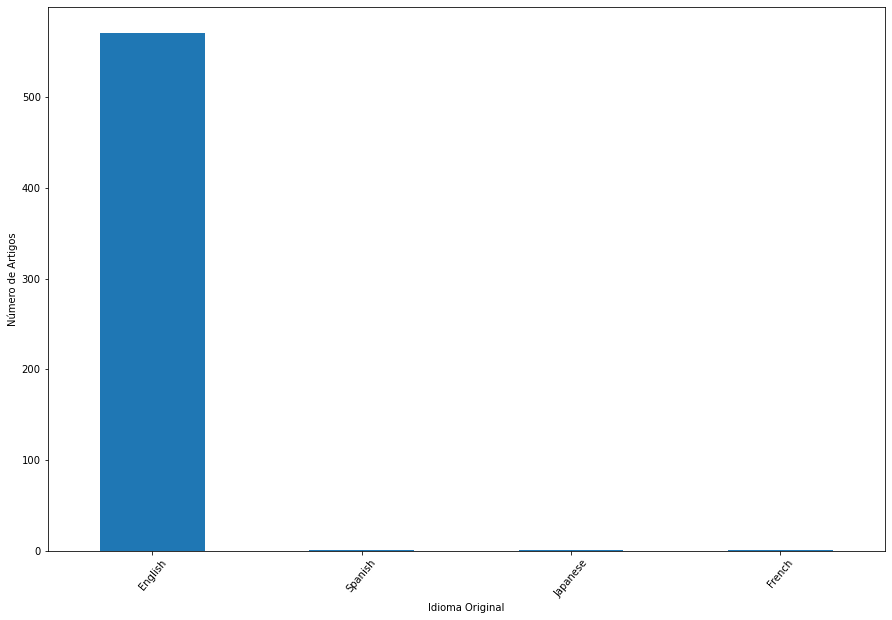

In [50]:
plt.figure(figsize=(15,10))
idioma.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Idioma Original")
plt.ylabel("Número de Artigos")
plt.show()

Visão geral em gráfico


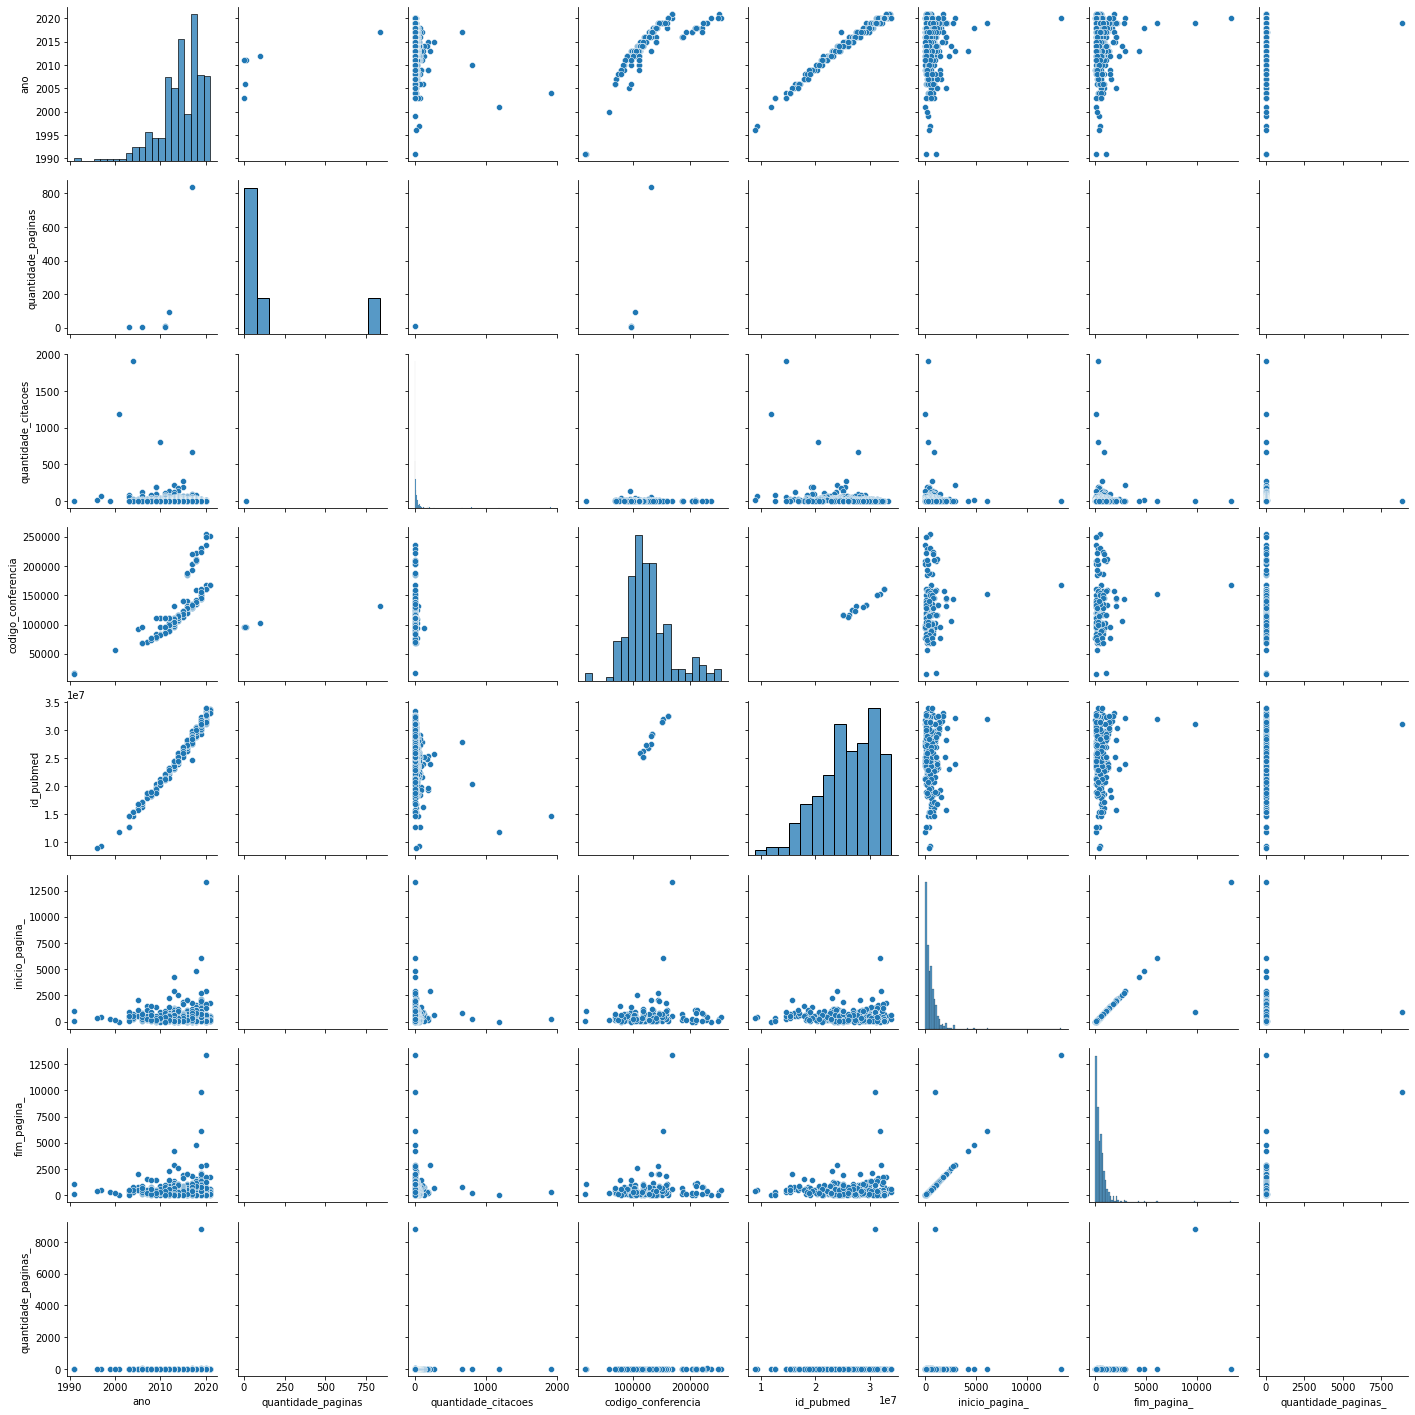

In [51]:
print('Visão geral em gráfico')
sns.pairplot(df_scopus)

In [52]:
## qtde de artigos financiados e nao financiados - criar coluna

In [53]:
## qtde de artigos patrociandores e nao patrociandores - criar coluna

In [54]:
## criar regex para identificar emails da coluna editores

In [55]:
## qtde de artigos por editores - unicos

In [56]:
## qtde de artigos por local de conferencia - unicos

In [57]:
## qtde de artigos por idioma_original - unicos

In [58]:
## qtde de artigos por tipo de documentos - unicos

## Nuvem de Palavras

 ### Nuvem de Palavras dos Títulos

In [59]:
import nltk
from nltk.corpus import stopwords

stopwords = stopwords.words('english')

print(stopwords)

# apend outras palavras

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [60]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
#df_scopus['issn_scopus'] = df_scopus.issn_scopus.str.upper()
palavras_titulo = df_scopus['titulo_artigo'].str.lower()
palavras_titulo

Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.


0      the unified medical language system (umls): in...
1      effective mapping of biomedical text to the um...
2      an overview of metamap: historical perspective...
3      disgenet: a comprehensive platform integrating...
4      pharmacovigilance from social media: mining ad...
                             ...                        
569    ub at clef 2005: bilingual clir and medical im...
570    automated indexing of the hazardous substances...
571                                              metamap
572    multivistm: a web-based interactive remote vis...
573    new method for identifying features of an imag...
Name: titulo_artigo, Length: 574, dtype: object

In [61]:
print(f'O objeto palavras é do tipo {type(palavras_titulo)} e tem o shape de {palavras_titulo.shape}')

O objeto palavras é do tipo <class 'pandas.core.series.Series'> e tem o shape de (574,)


In [62]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_titulo = " ".join(s for s in palavras_titulo)
#wordcloud_palavras

Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.


In [63]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_titulo)} e seu tipo atual é{type(wordcloud_palavras_titulo)}')

Quantidade de palavras no corpus: 53282 e seu tipo atual é<class 'str'>


In [64]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_titulo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_titulo)

Criação da nuvem de palavras sem tratamento nos textos


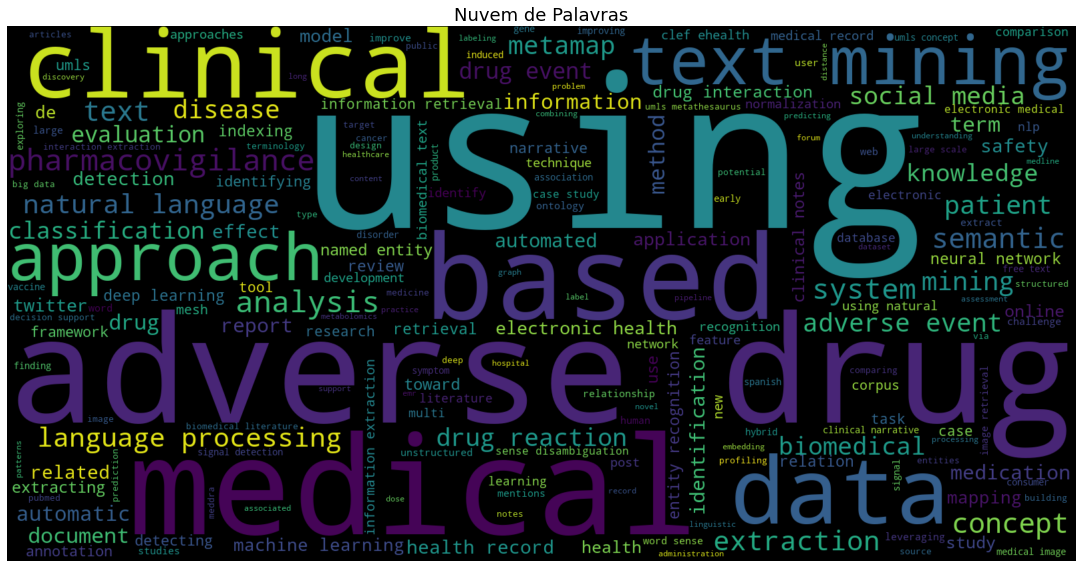

In [65]:
#Gráfico Nuvem de Palavras
# Gerando o grafico 
# Variáveis do gráfico 
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_titulo, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

### Nuvem de Palavras dos Resumos

In [66]:
print('Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.')
palavras_resumo = df_scopus['resumo'].str.lower()
palavras_resumo

Carregar novo dataframe de palavras apenas com dados da coluna texto, ou seja, uma série.


0      the unified medical language system (http://um...
1      the umls metathesaurus, the largest thesaurus ...
2      metamap is a widely available program providin...
3      the information about the genetic basis of hum...
4      objective social media is becoming increasingl...
                             ...                        
569    this paper presents the results of the state u...
570    the hazardous substances data bank (hsdb), a f...
571                              [no abstract available]
572    the evolution of hypermedia imagemap technolog...
573    the metamap process extends the concept of dir...
Name: resumo, Length: 574, dtype: object

In [67]:
print(f'Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.')
# Variável recebe conteúdo do dataframe palavras concatenando cada conteúdo do texto separando por espaço
wordcloud_palavras_resumo = " ".join(s for s in palavras_resumo)
#wordcloud_palavras

Criando Nuvem de Palavras sem tratamento para ter ideia do corpus.


In [68]:
print(f'Quantidade de palavras no corpus: {len(wordcloud_palavras_resumo)} e seu tipo atual é{type(wordcloud_palavras_resumo)}')

Quantidade de palavras no corpus: 799380 e seu tipo atual é<class 'str'>


In [69]:
print(f'Criação da nuvem de palavras sem tratamento nos textos')
wordcloud_resumo = WordCloud(stopwords=stopwords,
                      background_color='black', width=1600,                            
                      height=800).generate(wordcloud_palavras_resumo)

Criação da nuvem de palavras sem tratamento nos textos


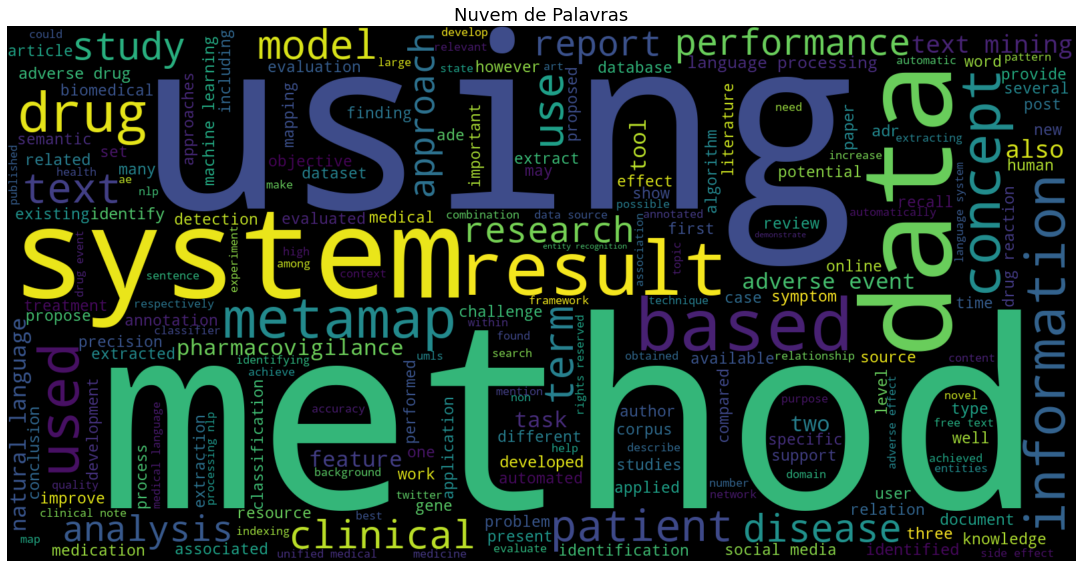

In [70]:
#Gráfico Nuvem de Palavras
path_image = '../image/'

titulo = 'Nuvem de Palavras'
#eixo_x = ''
#eixo_y = ''
image = path_image+'wordcloud'
extensao_arquivo = '.pdf'

#Gráfico
fig, ax = plt.subplots(figsize=(16,8))            
ax.imshow(wordcloud_resumo, interpolation='bilinear')
ax.set_axis_off()         

#legendas
#ax.legend(title='Legenda', loc=4, fontsize=9)
ax.set_title(titulo, fontsize=18)
#ax.set_xlabel(eixo_x, fontsize=9)
#ax.set_ylabel(eixo_y, fontsize=9)

#salvar imagens
plt.savefig(image+extensao_arquivo) #, format='pdf', dpi=300, transparent=True)
plt.tight_layout() 
plt.show()

### Nuvem de Palavras do Conteúdo dos textos

# Dataframe Qualis

## Ajustar de Colunas

### Alterar nome de colunas

In [71]:
print('Verificar colunas')
df_qualis.columns

Verificar colunas


Index(['ISSN', 'Título', 'Área de Avaliação', 'Estrato'], dtype='object')

In [72]:
columns_qualis = {
    'ISSN': 'issn_qualis',
    'Título':'titulo_periodico',
    'Área de Avaliação':'area_avaliacao', 
    'Estrato':'estrato',
}

In [73]:
df_qualis = df_qualis.rename(columns=columns_qualis)
df_qualis.head(1)

,issn_qualis,titulo_periodico,area_avaliacao,estrato
0,1981-030X,19&20 (RIO DE JANEIRO),"ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS ...",C


## Ajustar tipagem de dados

### Converter colunas para categórica

In [74]:
print('Ajustar tipagem dos dados')
df_qualis['estrato'] = df_qualis['estrato'].astype('category')

Ajustar tipagem dos dados


### Filtrar base Qualis

In [75]:
print(df_qualis['area_avaliacao'].unique())

['ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS CONTÁBEIS E TURISMO'
 'ANTROPOLOGIA / ARQUEOLOGIA                        '
 'ARQUITETURA, URBANISMO E DESIGN' 'ARTES'
 'ASTRONOMIA / FÍSICA                               ' 'BIODIVERSIDADE'
 'BIOTECNOLOGIA                                     '
 'CIÊNCIA DA COMPUTAÇÃO                             '
 'CIÊNCIA DE ALIMENTOS                              '
 'CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS        '
 'CIÊNCIAS AGRÁRIAS I                               '
 'CIÊNCIAS AMBIENTAIS'
 'CIÊNCIAS BIOLÓGICAS I                             '
 'CIÊNCIAS BIOLÓGICAS II                            '
 'CIÊNCIAS BIOLÓGICAS III                           '
 'CIÊNCIAS DA RELIGIÃO E TEOLOGIA' 'COMUNICAÇÃO E INFORMAÇÃO'
 'DIREITO                                           '
 'ECONOMIA                                          '
 'EDUCAÇÃO                                          '
 'EDUCAÇÃO FÍSICA                                   '
 'ENFERMAGEM                  

### Remover as areas abaixo

In [76]:

#%%timeit
df_remove = df_qualis.loc[
    (df_qualis['area_avaliacao'] == 'ADMINISTRAÇÃO PÚBLICA E DE EMPRESAS, CIÊNCIAS CONTÁBEIS E TURISMO') |
    (df_qualis['area_avaliacao'] == 'ARTES') |
    (df_qualis['area_avaliacao'] == 'ANTROPOLOGIA / ARQUEOLOGIA                        ') |
    (df_qualis['area_avaliacao'] == 'ARQUITETURA, URBANISMO E DESIGN') |
    (df_qualis['area_avaliacao'] == 'ASTRONOMIA / FÍSICA                               ') |
    (df_qualis['area_avaliacao'] == 'BIODIVERSIDADE') |
    (df_qualis['area_avaliacao'] == 'CIÊNCIAS AGRÁRIAS I                               ') |
    (df_qualis['area_avaliacao'] == 'CIÊNCIA DE ALIMENTOS                              ') |
    (df_qualis['area_avaliacao'] == 'CIÊNCIA POLÍTICA E RELAÇÕES INTERNACIONAIS        ') |
    (df_qualis['area_avaliacao'] == 'CIÊNCIAS AGRÁRIAS I                               ') |
    (df_qualis['area_avaliacao'] == 'CIÊNCIAS AMBIENTAIS') |   
    (df_qualis['area_avaliacao'] == 'CIÊNCIAS DA RELIGIÃO E TEOLOGIA') |
    (df_qualis['area_avaliacao'] == 'COMUNICAÇÃO E INFORMAÇÃO') |
    (df_qualis['area_avaliacao'] == 'DIREITO                                           ') |
    (df_qualis['area_avaliacao'] == 'ECONOMIA                                          ') |
    (df_qualis['area_avaliacao'] == 'EDUCAÇÃO                                          ') |
    (df_qualis['area_avaliacao'] == 'ENSINO') |
    (df_qualis['area_avaliacao'] == 'EDUCAÇÃO FÍSICA                                   ') |
    (df_qualis['area_avaliacao'] == 'ENGENHARIAS I                                     ') |
    (df_qualis['area_avaliacao'] == 'ENGENHARIAS II                                    ') |
    (df_qualis['area_avaliacao'] == 'ENGENHARIAS III                                   ') |
    (df_qualis['area_avaliacao'] == 'ENGENHARIAS IV                                    ' ) |
    (df_qualis['area_avaliacao'] == 'GEOCIÊNCIAS                                       ' ) |
    (df_qualis['area_avaliacao'] == 'FILOSOFIA') |
    (df_qualis['area_avaliacao'] == 'GEOGRAFIA                                         ') |
    (df_qualis['area_avaliacao'] == 'HISTÓRIA                                          ') |
    (df_qualis['area_avaliacao'] == 'INTERDISCIPLINAR                                  ') |
    (df_qualis['area_avaliacao'] == 'LINGUíSTICA E LITERATURA') |
    (df_qualis['area_avaliacao'] == 'MATERIAIS                                         ') |
    (df_qualis['area_avaliacao'] ==  'MEDICINA VETERINÁRIA                              ') |
    (df_qualis['area_avaliacao'] ==  'NUTRIÇÃO') |
    (df_qualis['area_avaliacao'] == 'PLANEJAMENTO URBANO E REGIONAL / DEMOGRAFIA       ') |
    (df_qualis['area_avaliacao'] == 'SERVIÇO SOCIAL                                    ') |
    (df_qualis['area_avaliacao'] == 'SOCIOLOGIA                                        ') |
    (df_qualis['area_avaliacao'] ==  'ZOOTECNIA / RECURSOS PESQUEIROS                   ') 
 
]

df_qualis_filtrado = df_qualis.drop(df_remove.index)
df_qualis_filtrado

,issn_qualis,titulo_periodico,area_avaliacao,estrato
12853,2328-0662,# ISOJ JOURNAL,BIOTECNOLOGIA ...,C
12854,2190-5738,3 BIOTECH,BIOTECNOLOGIA ...,B3
12855,0101-9163,A HORA VETERINÁRIA,BIOTECNOLOGIA ...,C
12856,1232-1966,AAEM. ANNALS OF AGRICULTURAL AND ENVIRONMENTAL...,BIOTECNOLOGIA ...,B3
12857,1530-9932,AAPS PHARMSCITECH,BIOTECNOLOGIA ...,B1
...,...,...,...,...
126668,1696-3202,"ÁTOPOS - SALUD MENTAL, COMUNIDAD Y CULTURA",SAÚDE COLETIVA ...,B5
126669,2316-4360,ÉLISÉE - REVISTA DE GEOGRAFIA DA UEG,SAÚDE COLETIVA ...,B5
126670,1929-7017,ÉTHIQUE PUBLIQUE - REVUE INTERNATIONALE D'ÉTHI...,SAÚDE COLETIVA ...,C
126671,1415-899X,ÚLTIMO ANDAR (PUCSP. IMPRESSO),SAÚDE COLETIVA ...,B5


## Analisar dataframe tratado

In [77]:
print('Verificando tipos e se tem dados nulos')
df_qualis_filtrado.info()

Verificando tipos e se tem dados nulos
<class 'pandas.core.frame.DataFrame'>
Int64Index: 47063 entries, 12853 to 126672
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   issn_qualis       47063 non-null  object  
 1   titulo_periodico  47063 non-null  object  
 2   area_avaliacao    47063 non-null  object  
 3   estrato           47063 non-null  category
dtypes: category(1), object(3)
memory usage: 1.5+ MB


In [78]:
print('Resumo Estatístico de Campos Numéricos')
df_qualis_filtrado.describe()

Resumo Estatístico de Campos Numéricos


,issn_qualis,titulo_periodico,area_avaliacao,estrato
count,47063,47063,47063,47063
unique,14975,15603,15,8
top,1932-6203,PLOS ONE,MEDICINA I ...,B1
freq,60,57,5181,9020


In [79]:
# ver qtd no excel =NÚM.CARACT(O2)
print('Coluna com maior qtde de caracteres')
df_qualis_filtrado['titulo_periodico'].apply(str).map(len).max()

Coluna com maior qtde de caracteres


254

## Visualizações Qualis

### Anáilise Area de Avaliação

In [80]:
df_qualis_filtrado.columns


Index(['issn_qualis', 'titulo_periodico', 'area_avaliacao', 'estrato'], dtype='object')

In [81]:
# Groupby by
area_avaliacao_all = df_qualis_filtrado.groupby("area_avaliacao")

# Summary statistic of all
area_avaliacao_all.describe().head()

issn_qualis         \
                                                         count unique   
area_avaliacao                                                          
BIOTECNOLOGIA                                             4376   4137   
CIÊNCIA DA COMPUTAÇÃO                                     1850   1775   
CIÊNCIAS BIOLÓGICAS I                                     3870   3677   
CIÊNCIAS BIOLÓGICAS II                                    3889   3681   
CIÊNCIAS BIOLÓGICAS III                                   2403   2276   

                                                                    \
                                                          top freq   
area_avaliacao                                                       
BIOTECNOLOGIA                                       0100-4042    5   
CIÊNCIA DA COMPUTAÇÃO                               1932-6203    3   
CIÊNCIAS BIOLÓGICAS I                               1932-6203    4   
CIÊNCIAS BIOLÓGICAS II                              1932-6203    5   
CIÊNCIAS BIOLÓGICAS III                             1932-6203    8   

                                                   titulo_periodico         \
                                                              count unique   
area_avaliacao                                                               
BIOTECNOLOGIA                                                  4376   4211   
CIÊNCIA DA COMPUTAÇÃO                                          1850   1794   
CIÊNCIAS BIOLÓGICAS I                                          3870   3750   
CIÊNCIAS BIOLÓGICAS II                                         3889   3760   
CIÊNCIAS BIOLÓGICAS III                                        2403   2330   

                                                                                            \
                                                                                       top   
area_avaliacao                                                                               
BIOTECNOLOGIA                                                                     PLOS ONE   
CIÊNCIA DA COMPUTAÇÃO                               REVISTA DE SISTEMAS E COMPUTAÇÃO - RSC   
CIÊNCIAS BIOLÓGICAS I                                                             PLOS ONE   
CIÊNCIAS BIOLÓGICAS II                              TRENDS IN PSYCHIATRY AND PSYCHOTHERAPY   
CIÊNCIAS BIOLÓGICAS III                                                           PLOS ONE   

                                                        estrato             \
                                                   freq   count unique top   
area_avaliacao                                                               
BIOTECNOLOGIA                                         4    4376      8  B1   
CIÊNCIA DA COMPUTAÇÃO                                 3    1850      8  C    
CIÊNCIAS BIOLÓGICAS I                                 4    3870      8  C    
CIÊNCIAS BIOLÓGICAS II                                4    3889      8  B1   
CIÊNCIAS BIOLÓGICAS III                               7    2403      8  C    

                                                         
                                                   freq  
area_avaliacao                                           
BIOTECNOLOGIA                                       800  
CIÊNCIA DA COMPUTAÇÃO                               378  
CIÊNCIAS BIOLÓGICAS I                               775  
CIÊNCIAS BIOLÓGICAS II                              766  
CIÊNCIAS BIOLÓGICAS III                             490

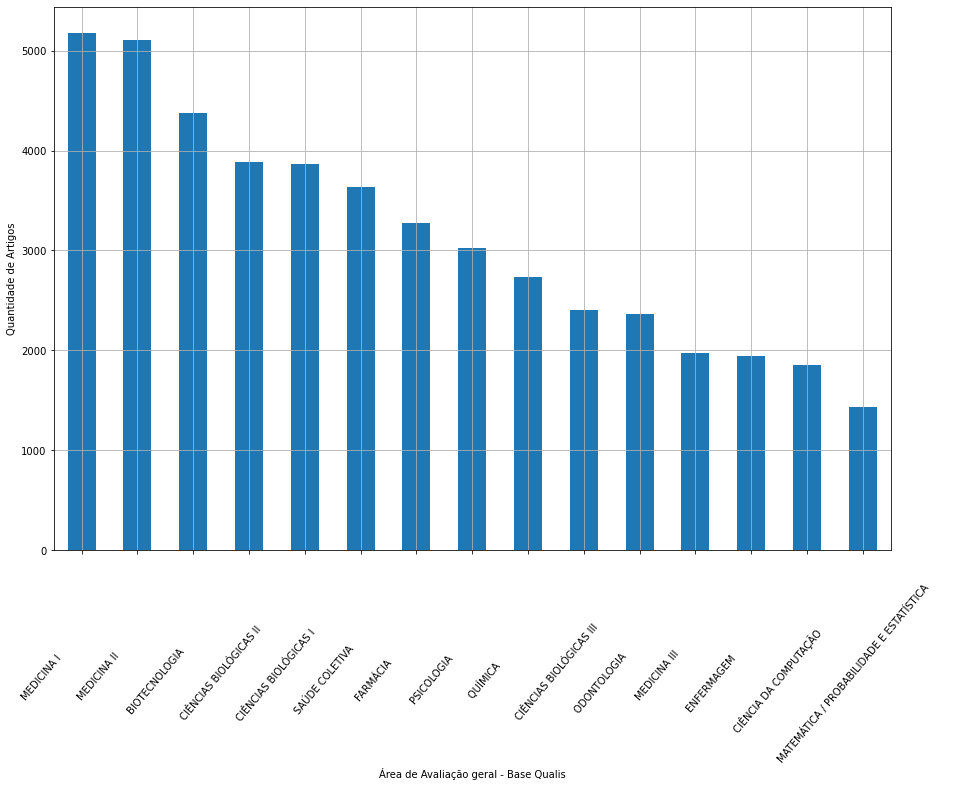

In [82]:
# pegar as 10 +
plt.figure(figsize=(15,10))
area_avaliacao_all.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Área de Avaliação geral - Base Qualis")
plt.ylabel("Quantidade de Artigos")
plt.grid()
plt.show()

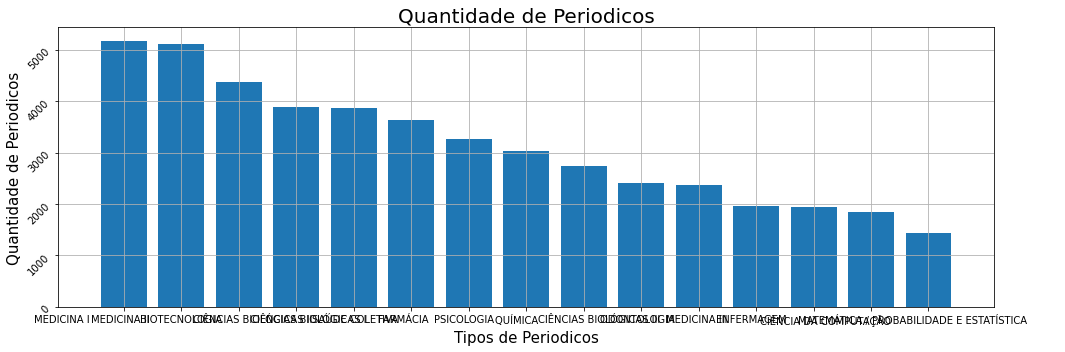

In [83]:
### Gerando gráfico Tipo de Extensões

#variáveis do gráfico
titulo = 'Quantidade de Periodicos'
eixo_x = 'Tipos de Periodicos'
eixo_y = 'Quantidade de Periodicos'
data_hora = datetime.datetime.now()
path = os.path.join('..','image')
img_extensao = '.png'
image = ''

# Matplotlib
fig, ax = plt.subplots(figsize=(15,5))
plt.bar(df_qualis_filtrado['area_avaliacao'].value_counts().index, df_qualis_filtrado['area_avaliacao'].value_counts())

#Legendas e eixos
#ax.legend(title='Legenda', loc=4, fontsize=20)
ax.set_title(titulo, fontsize=20)
ax.set_xlabel(eixo_x, fontsize=15)
ax.set_ylabel(eixo_y, fontsize=15)
plt.yticks(rotation=45) ## agrupar datas por meses, trimestre ou ano, etc

plt.grid()

#Salvar imagem
#plt.savefig(path+image, dpi=300)
plt.tight_layout()
plt.show()

plt.show()

# Dataframe PubMEd

# Dataframe CAPES

# Unir / Merge de dataframes

In [84]:
#df_qualis["issn_qualis_ajustado"] = 
df_qualis_filtrado["issn_qualis"].replace('-','',regex=True, inplace=True)

In [85]:
df_qualis_filtrado["issn_qualis"]

12853     23280662
12854     21905738
12855     01019163
12856     12321966
12857     15309932
            ...   
126668    16963202
126669    23164360
126670    19297017
126671    1415899X
126672    19808305
Name: issn_qualis, Length: 47063, dtype: object

In [86]:
df_scopus['issn_scopus'] = df_scopus.issn_scopus.str.upper()
df_qualis_filtrado['issn_qualis'] = df_qualis_filtrado.issn_qualis.str.upper()

In [87]:
df_scopus['issn_scopus']

0      03051048
1      1531605X
2      10675027
3      03051048
4      10675027
         ...   
569    03029743
570    15508390
571    10829873
572    0277786X
573    0277786X
Name: issn_scopus, Length: 574, dtype: object

In [88]:
df_qualis_filtrado['issn_qualis']

12853     23280662
12854     21905738
12855     01019163
12856     12321966
12857     15309932
            ...   
126668    16963202
126669    23164360
126670    19297017
126671    1415899X
126672    19808305
Name: issn_qualis, Length: 47063, dtype: object

In [89]:
## criar um dataframe q une o links_regulamentos_fundos + allLines, ligados pelo nome do arquivo
df_bases = df_scopus.merge(df_qualis_filtrado, left_on='issn_scopus', right_on='issn_qualis', how='left', indicator=True)
df_bases

,autores,id_autores,titulo_artigo,ano,titulo_fonte,volume,publicado,numero_artigo,inicio_pagina,fim_pagina,...,fonte,eid,inicio_pagina_,fim_pagina_,quantidade_paginas_,issn_qualis,titulo_periodico,area_avaliacao,estrato,_merge
0,Bodenreider O.,6603893164;,The Unified Medical Language System (UMLS): In...,2004,Nucleic Acids Research,32,DATABASE ISS.,NaN,D267,D270,...,Scopus,2-s2.0-0345863927,267.0,270.0,3.0,03051048,NUCLEIC ACIDS RESEARCH,BIOTECNOLOGIA ...,A1,both
1,Bodenreider O.,6603893164;,The Unified Medical Language System (UMLS): In...,2004,Nucleic Acids Research,32,DATABASE ISS.,NaN,D267,D270,...,Scopus,2-s2.0-0345863927,267.0,270.0,3.0,03051048,NUCLEIC ACIDS RESEARCH,CIÊNCIA DA COMPUTAÇÃO ...,B2,both
2,Bodenreider O.,6603893164;,The Unified Medical Language System (UMLS): In...,2004,Nucleic Acids Research,32,DATABASE ISS.,NaN,D267,D270,...,Scopus,2-s2.0-0345863927,267.0,270.0,3.0,03051048,NUCLEIC ACIDS RESEARCH,CIÊNCIAS BIOLÓGICAS I ...,A1,both
3,Bodenreider O.,6603893164;,The Unified Medical Language System (UMLS): In...,2004,Nucleic Acids Research,32,DATABASE ISS.,NaN,D267,D270,...,Scopus,2-s2.0-0345863927,267.0,270.0,3.0,03051048,NUCLEIC ACIDS RESEARCH,CIÊNCIAS BIOLÓGICAS II ...,A1,both
4,Bodenreider O.,6603893164;,The Unified Medical Language System (UMLS): In...,2004,Nucleic Acids Research,32,DATABASE ISS.,NaN,D267,D270,...,Scopus,2-s2.0-0345863927,267.0,270.0,3.0,03051048,NUCLEIC ACIDS RESEARCH,CIÊNCIAS BIOLÓGICAS III ...,A1,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2331,"Doyle M., Klein G., Hussaini F., Pescitelli M.",57197355375;57199985005;6603483180;6508147369;,MultiVISTM: A Web-based interactive remote vis...,2000,Proceedings of SPIE - The International Societ...,3905,NaN,NaN,173,182,...,Scopus,2-s2.0-0033726217,173.0,182.0,9.0,0277786X,"PROCEEDINGS OF SPIE, THE INTERNATIONAL SOCIETY...",QUÍMICA ...,C,both
2332,Doyle Michael,36804804600;,New method for identifying features of an imag...,1991,Proceedings of SPIE - The International Societ...,1380,NaN,NaN,86,95,...,Scopus,2-s2.0-0025862606,86.0,95.0,9.0,0277786X,"PROCEEDINGS OF SPIE, THE INTERNATIONAL SOCIETY...",MEDICINA II ...,B4,both
2333,Doyle Michael,36804804600;,New method for identifying features of an imag...,1991,Proceedings of SPIE - The International Societ...,1380,NaN,NaN,86,95,...,Scopus,2-s2.0-0025862606,86.0,95.0,9.0,0277786X,"PROCEEDINGS OF SPIE, THE INTERNATIONAL SOCIETY...",MEDICINA III ...,B4,both
2334,Doyle Michael,36804804600;,New method for identifying features of an imag...,1991,Proceedings of SPIE - The International Societ...,1380,NaN,NaN,86,95,...,Scopus,2-s2.0-0025862606,86.0,95.0,9.0,0277786X,"PROCEEDINGS OF SPIE, THE INTERNATIONAL SOCIETY...",ODONTOLOGIA ...,B4,both


In [90]:
#df_scopus.merge(df_qualis, left_on='issn_scopus', right_on='issn_qualis', how='left', validate='m:m')

In [91]:
df_bases[['autores','titulo_artigo','area_avaliacao','issn_scopus','issn_qualis','estrato']]

,autores,titulo_artigo,area_avaliacao,issn_scopus,issn_qualis,estrato
0,Bodenreider O.,The Unified Medical Language System (UMLS): In...,BIOTECNOLOGIA ...,03051048,03051048,A1
1,Bodenreider O.,The Unified Medical Language System (UMLS): In...,CIÊNCIA DA COMPUTAÇÃO ...,03051048,03051048,B2
2,Bodenreider O.,The Unified Medical Language System (UMLS): In...,CIÊNCIAS BIOLÓGICAS I ...,03051048,03051048,A1
3,Bodenreider O.,The Unified Medical Language System (UMLS): In...,CIÊNCIAS BIOLÓGICAS II ...,03051048,03051048,A1
4,Bodenreider O.,The Unified Medical Language System (UMLS): In...,CIÊNCIAS BIOLÓGICAS III ...,03051048,03051048,A1
...,...,...,...,...,...,...
2331,"Doyle M., Klein G., Hussaini F., Pescitelli M.",MultiVISTM: A Web-based interactive remote vis...,QUÍMICA ...,0277786X,0277786X,C
2332,Doyle Michael,New method for identifying features of an imag...,MEDICINA II ...,0277786X,0277786X,B4
2333,Doyle Michael,New method for identifying features of an imag...,MEDICINA III ...,0277786X,0277786X,B4
2334,Doyle Michael,New method for identifying features of an imag...,ODONTOLOGIA ...,0277786X,0277786X,B4


In [92]:
print(type(df_bases['_merge'].unique()))

<class 'pandas.core.arrays.categorical.Categorical'>


In [93]:
print(df_bases['_merge'].unique())

['both', 'left_only']
Categories (2, object): ['both', 'left_only']


In [94]:
df_bases.nunique()

autores                        549
id_autores                     546
titulo_artigo                  572
ano                             25
titulo_fonte                   220
volume                         208
publicado                       39
numero_artigo                  147
inicio_pagina                  340
fim_pagina                     342
quantidade_paginas               5
quantidade_citacoes             81
doi                            459
link_scopus                    574
afiliacoes                     552
autores_com_filiacoes          567
resumo                         565
palavras_chaves_autor          394
palavras_chave_index           520
numeros_sequencia_molecular      1
chemicals_cas                   94
nomes_comerciais                16
fabricantes                      2
detalhes_financiamento         228
texto_financiamento_1          187
texto_financiamento_2           18
texto_financiamento_3            2
referencias                    521
endereco_corresponde

In [95]:
df_bases.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2336 entries, 0 to 2335
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   autores                      2336 non-null   object  
 1   id_autores                   2336 non-null   object  
 2   titulo_artigo                2336 non-null   object  
 3   ano                          2336 non-null   int64   
 4   titulo_fonte                 2336 non-null   object  
 5   volume                       2238 non-null   object  
 6   publicado                    1419 non-null   object  
 7   numero_artigo                1147 non-null   object  
 8   inicio_pagina                1187 non-null   object  
 9   fim_pagina                   1157 non-null   object  
 10  quantidade_paginas           10 non-null     float64 
 11  quantidade_citacoes          1960 non-null   float64 
 12  doi                          2191 non-null   object  
 13  lin

In [96]:
# Criar colunas
df_bases['leitura_Resumo']=None 
df_bases['leitura_Conclusao']=None 
df_bases['leitura_completa']=None 

## Visualizações Base Geral

### Analisando Nomes Comerciais

In [97]:
#Colocar + para baixo após criar este df

# Groupby by
nomes_comerciais = df_bases.groupby("nomes_comerciais")

# Summary statistic of all
nomes_comerciais.describe().head()

ano                       \
                                                   count    mean  std     min   
nomes_comerciais                                                                
ABGene; Genome Function Integrated Discoverer; ...   9.0  2006.0  0.0  2006.0   
ABNER; MetaMap; OSCAR 3                              9.0  2009.0  0.0  2009.0   
ARRS GoldMiner; MeSH, us national library of me...   4.0  2008.0  0.0  2008.0   
GATE chunker; Genia Tagger; GENIA Treebank; Lin...   3.0  2011.0  0.0  2011.0   
Literature Mining for Toxicology                     8.0  2017.0  0.0  2017.0   

                                                                            \
                                                       25%     50%     75%   
nomes_comerciais                                                             
ABGene; Genome Function Integrated Discoverer; ...  2006.0  2006.0  2006.0   
ABNER; MetaMap; OSCAR 3                             2009.0  2009.0  2009.0   
ARRS GoldMiner; MeSH, us national library of me...  2008.0  2008.0  2008.0   
GATE chunker; Genia Tagger; GENIA Treebank; Lin...  2011.0  2011.0  2011.0   
Literature Mining for Toxicology                    2017.0  2017.0  2017.0   

                                                           quantidade_paginas  \
                                                       max              count   
nomes_comerciais                                                                
ABGene; Genome Function Integrated Discoverer; ...  2006.0                0.0   
ABNER; MetaMap; OSCAR 3                             2009.0                0.0   
ARRS GoldMiner; MeSH, us national library of me...  2008.0                0.0   
GATE chunker; Genia Tagger; GENIA Treebank; Lin...  2011.0                0.0   
Literature Mining for Toxicology                    2017.0                0.0   

                                                         ... fim_pagina_  \
                                                   mean  ...         75%   
nomes_comerciais                                         ...               
ABGene; Genome Function Integrated Discoverer; ...  NaN  ...         NaN   
ABNER; MetaMap; OSCAR 3                             NaN  ...         NaN   
ARRS GoldMiner; MeSH, us national library of me...  NaN  ...       279.0   
GATE chunker; Genia Tagger; GENIA Treebank; Lin...  NaN  ...       360.0   
Literature Mining for Toxicology                    NaN  ...       489.0   

                                                          quantidade_paginas_  \
                                                      max               count   
nomes_comerciais                                                                
ABGene; Genome Function Integrated Discoverer; ...    NaN                 0.0   
ABNER; MetaMap; OSCAR 3                               NaN                 0.0   
ARRS GoldMiner; MeSH, us national library of me...  279.0                 4.0   
GATE chunker; Genia Tagger; GENIA Treebank; Lin...  360.0                 3.0   
Literature Mining for Toxicology                    489.0                 8.0   

                                                                             \
                                                   mean  std  min  25%  50%   
nomes_comerciais                                                              
ABGene; Genome Function Integrated Discoverer; ...  NaN  NaN  NaN  NaN  NaN   
ABNER; MetaMap; OSCAR 3                             NaN  NaN  NaN  NaN  NaN   
ARRS GoldMiner; MeSH, us national library of me...  5.0  0.0  5.0  5.0  5.0   
GATE chunker; Genia Tagger; GENIA Treebank; Lin...  6.0  0.0  6.0  6.0  6.0   
Literature Mining for Toxicology                    5.0  0.0  5.0  5.0  5.0   

                                                              
                                                    75%  max  
nomes_comerciais                                              
ABGene; Genome Function Integrated Discoverer; ...

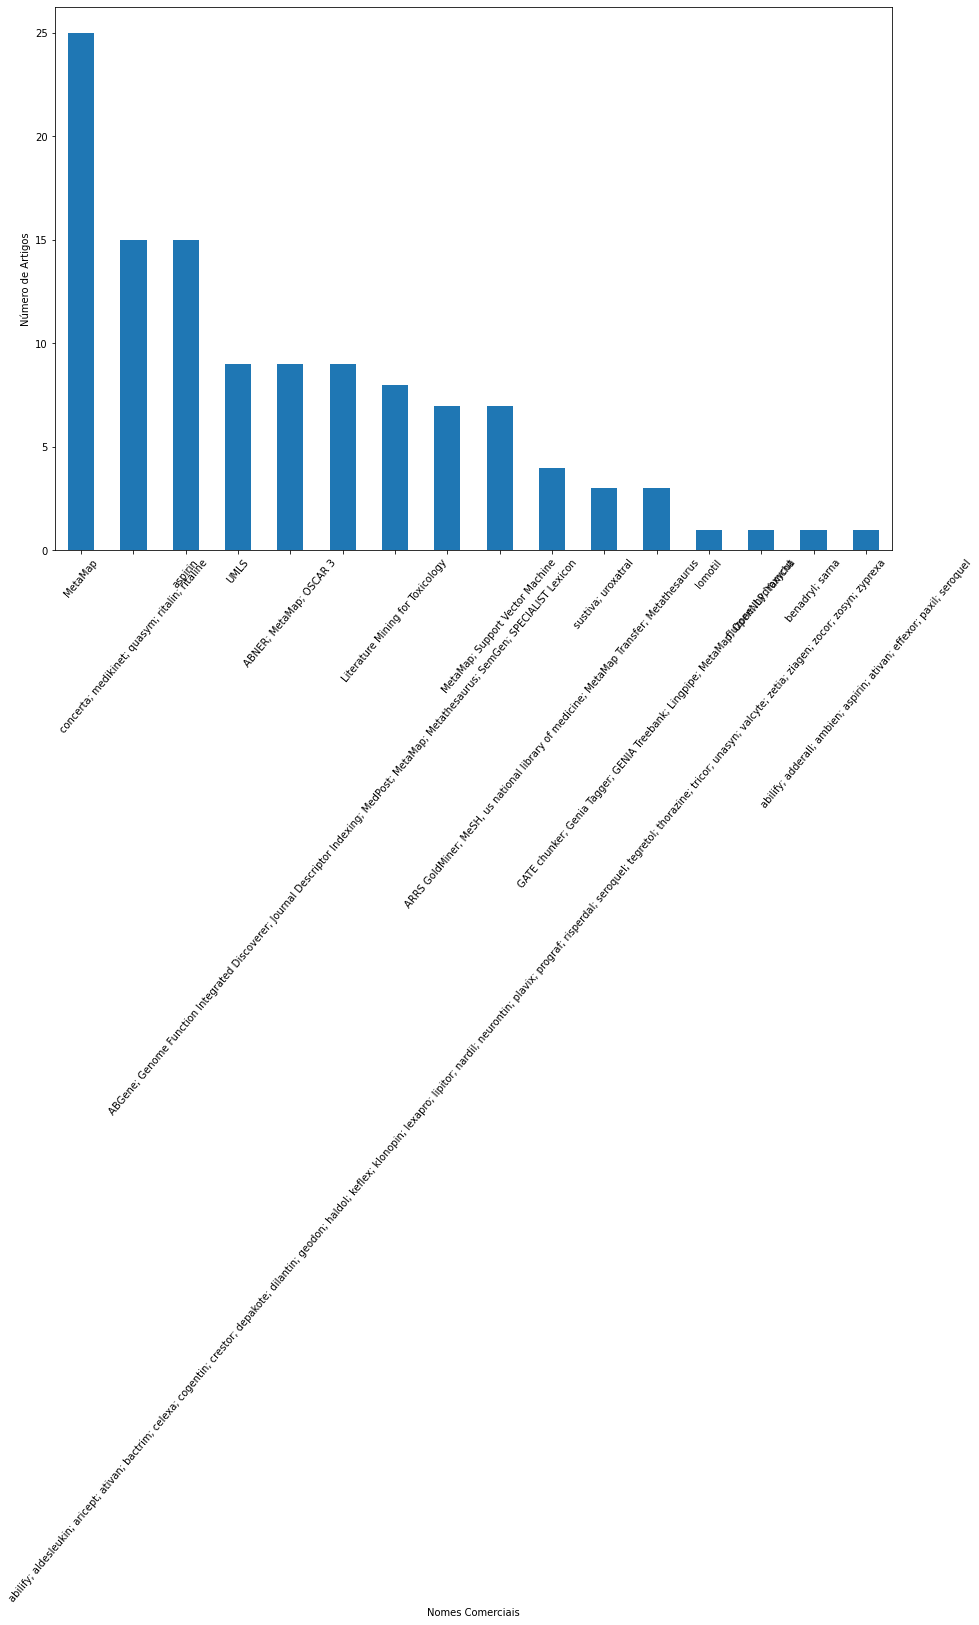

In [98]:
plt.figure(figsize=(15,10))
nomes_comerciais.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Nomes Comerciais")
plt.ylabel("Número de Artigos")
plt.show()

In [99]:
# Groupby by
area_avaliacao = df_bases.groupby("area_avaliacao")

# Summary statistic of all
area_avaliacao.describe().head()

ano               \
                                                    count         mean   
area_avaliacao                                                           
BIOTECNOLOGIA                                       137.0  2015.043796   
CIÊNCIA DA COMPUTAÇÃO                               338.0  2014.920118   
CIÊNCIAS BIOLÓGICAS I                               192.0  2015.218750   
CIÊNCIAS BIOLÓGICAS II                              118.0  2015.898305   
CIÊNCIAS BIOLÓGICAS III                             138.0  2016.021739   

                                                                               \
                                                         std     min      25%   
area_avaliacao                                                                  
BIOTECNOLOGIA                                       4.061781  2004.0  2013.00   
CIÊNCIA DA COMPUTAÇÃO                               4.136701  1997.0  2013.00   
CIÊNCIAS BIOLÓGICAS I                               3.876910  2004.0  2013.00   
CIÊNCIAS BIOLÓGICAS II                              3.944898  2004.0  2013.25   
CIÊNCIAS BIOLÓGICAS III                             3.796786  2004.0  2014.00   

                                                                            \
                                                       50%     75%     max   
area_avaliacao                                                               
BIOTECNOLOGIA                                       2016.0  2018.0  2021.0   
CIÊNCIA DA COMPUTAÇÃO                               2015.0  2018.0  2021.0   
CIÊNCIAS BIOLÓGICAS I                               2016.0  2018.0  2021.0   
CIÊNCIAS BIOLÓGICAS II                              2017.0  2019.0  2021.0   
CIÊNCIAS BIOLÓGICAS III                             2017.0  2019.0  2021.0   

                                                   quantidade_paginas  \
                                                                count   
area_avaliacao                                                          
BIOTECNOLOGIA                                                     0.0   
CIÊNCIA DA COMPUTAÇÃO                                             3.0   
CIÊNCIAS BIOLÓGICAS I                                             0.0   
CIÊNCIAS BIOLÓGICAS II                                            0.0   
CIÊNCIAS BIOLÓGICAS III                                           0.0   

                                                                ...  \
                                                          mean  ...   
area_avaliacao                                                  ...   
BIOTECNOLOGIA                                              NaN  ...   
CIÊNCIA DA COMPUTAÇÃO                               311.333333  ...   
CIÊNCIAS BIOLÓGICAS I                                      NaN  ...   
CIÊNCIAS BIOLÓGICAS II                                     NaN  ...   
CIÊNCIAS BIOLÓGICAS III                                    NaN  ...   

                                                   fim_pagina_          \
                                                           75%     max   
area_avaliacao                                                           
BIOTECNOLOGIA                                            747.5  2917.0   
CIÊNCIA DA COMPUTAÇÃO                                    629.0  4809.0   
CIÊNCIAS BIOLÓGICAS I                                    630.5  9808.0   
CIÊNCIAS BIOLÓGICAS II                                  1117.0  2917.0   
CIÊNCIAS BIOLÓGICAS III                                 1117.0  2917.0   

                                                   quantidade_paginas_  \
                                                                 count   
area_avaliacao                                                           
BIOTECNOLOGIA                                                     63.0   
CIÊNCIA DA COMPUTAÇÃO                                            209.0   
CIÊNCIAS BIOLÓGICAS I                                            106.0

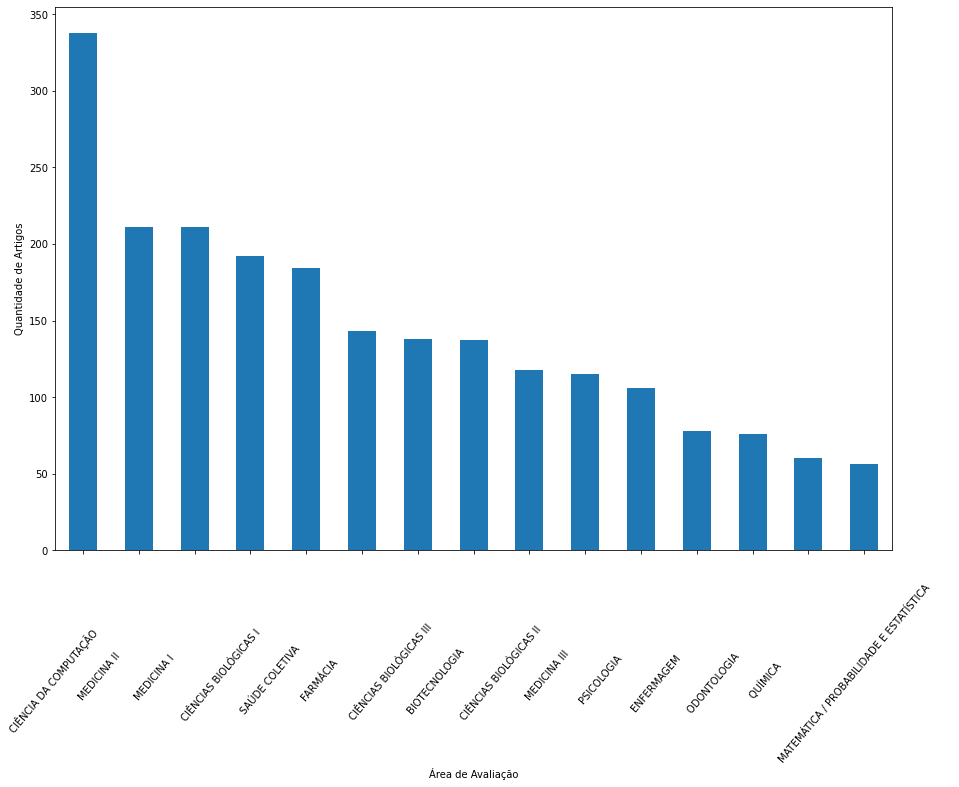

In [100]:
# pegar as 10 +
plt.figure(figsize=(15,10))
area_avaliacao.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Área de Avaliação")
plt.ylabel("Quantidade de Artigos")
plt.show()

### Análise de Titulo Periodico

In [101]:
# Groupby by
titulo_periodico = df_bases.groupby("titulo_periodico")

# Summary statistic of all
titulo_periodico.describe().head()

ano                            \
                                              count    mean       std     min   
titulo_periodico                                                                
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING  12.0  2019.0  1.206045  2018.0   
APPLIED CLINICAL INFORMATICS                   12.0  2015.0  2.088932  2013.0   
APPLIED SOFT COMPUTING (PRINT)                  2.0  2019.0  0.000000  2019.0   
ARTIFICIAL INTELLIGENCE IN MEDICINE (PRINT)     6.0  2017.0  1.095445  2016.0   
BIOANALYSIS (PRINT)                             7.0  2012.0  0.000000  2012.0   

                                                                               \
                                                  25%     50%     75%     max   
titulo_periodico                                                                
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING  2018.0  2018.5  2020.0  2021.0   
APPLIED CLINICAL INFORMATICS                   2013.0  2015.0  2017.0  2017.0   
APPLIED SOFT COMPUTING (PRINT)                 2019.0  2019.0  2019.0  2019.0   
ARTIFICIAL INTELLIGENCE IN MEDICINE (PRINT)    2016.0  2017.0  2018.0  2018.0   
BIOANALYSIS (PRINT)                            2012.0  2012.0  2012.0  2012.0   

                                              quantidade_paginas       ...  \
                                                           count mean  ...   
titulo_periodico                                                       ...   
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING                0.0  NaN  ...   
APPLIED CLINICAL INFORMATICS                                 0.0  NaN  ...   
APPLIED SOFT COMPUTING (PRINT)                               0.0  NaN  ...   
ARTIFICIAL INTELLIGENCE IN MEDICINE (PRINT)                  0.0  NaN  ...   
BIOANALYSIS (PRINT)                                          0.0  NaN  ...   

                                              fim_pagina_          \
                                                      75%     max   
titulo_periodico                                                    
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING      855.00  1131.0   
APPLIED CLINICAL INFORMATICS                       652.75  1030.0   
APPLIED SOFT COMPUTING (PRINT)                        NaN     NaN   
ARTIFICIAL INTELLIGENCE IN MEDICINE (PRINT)         76.00    76.0   
BIOANALYSIS (PRINT)                               2301.00  2301.0   

                                              quantidade_paginas_             \
                                                            count       mean   
titulo_periodico                                                               
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING                12.0   9.166667   
APPLIED CLINICAL INFORMATICS                                 12.0  11.500000   
APPLIED SOFT COMPUTING (PRINT)                                0.0        NaN   
ARTIFICIAL INTELLIGENCE IN MEDICINE (PRINT)                   6.0  17.000000   
BIOANALYSIS (PRINT)                                           7.0  10.000000   

                                                                            \
                                                    std   min    25%   50%   
titulo_periodico                                                             
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING  0.389249   9.0   9.00   9.0   
APPLIED CLINICAL INFORMATICS                   2.611165   8.0  10.25  11.5   
APPLIED SOFT COMPUTING (PRINT)                      NaN   NaN    NaN   NaN   
ARTIFICIAL INTELLIGENCE IN MEDICINE (PRINT)    3.286335  14.0  14.00  17.0   
BIOANALYSIS (PRINT)                            0.000000  10.0  10.00  10.0   

                                                            
                                                 75%   max  
titulo_periodico                                            
ADVANCES IN INTELLIGENT SYSTEMS AND COMPUTING   9.00  10.0  
APPLIED CLINICAL INFORMATICS                   12.75  15.0  
A

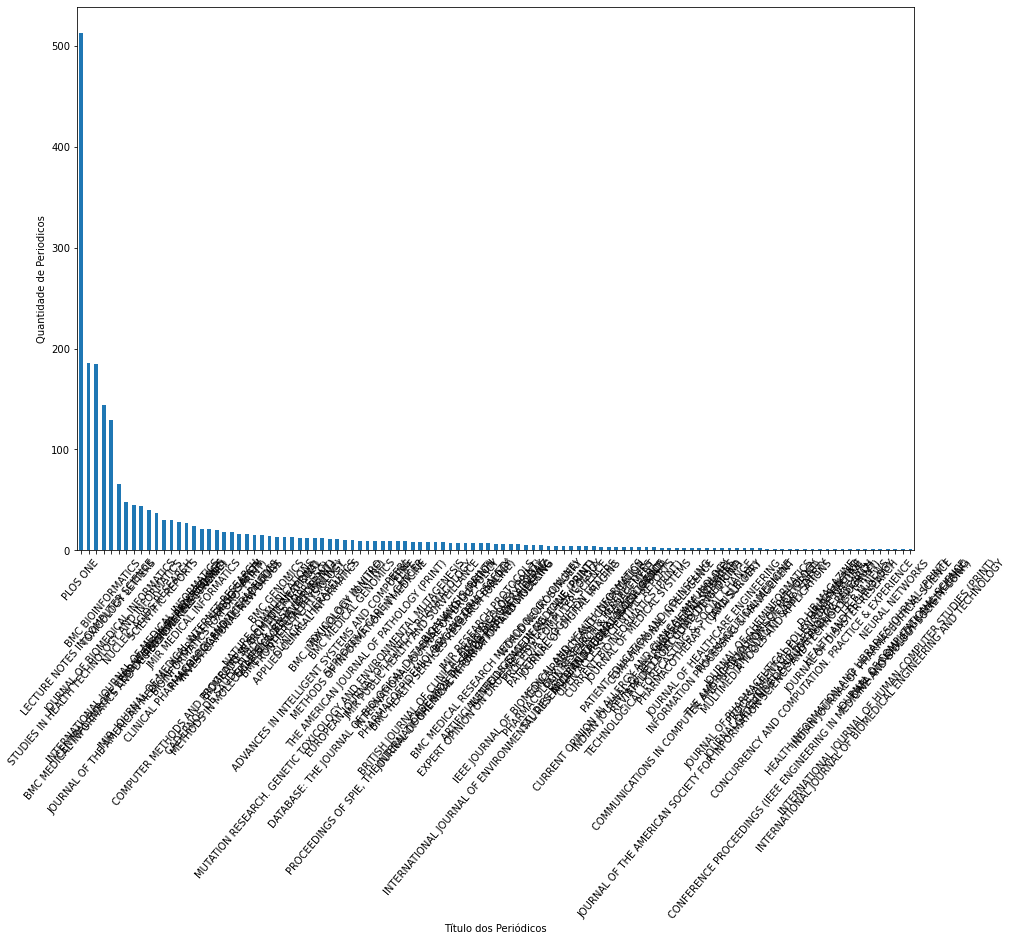

In [102]:
# pegar as 10 +
plt.figure(figsize=(15,10))
titulo_periodico.size().sort_values(ascending=False).plot.bar()
plt.xticks(rotation=50)
plt.xlabel("Título dos Periódicos")
plt.ylabel("Quantidade de Periodicos")
plt.show()

# Exportação do resultado para Excel

In [103]:
df_scopus.columns

Index(['autores', 'id_autores', 'titulo_artigo', 'ano', 'titulo_fonte',
       'volume', 'publicado', 'numero_artigo', 'inicio_pagina', 'fim_pagina',
       'quantidade_paginas', 'quantidade_citacoes', 'doi', 'link_scopus',
       'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes', 'detalhes_financiamento', 'texto_financiamento_1',
       'texto_financiamento_2', 'texto_financiamento_3', 'referencias',
       'endereco_correspondencia', 'editores', 'patrocinadores', 'editor',
       'nome_conferencia', 'data_conferencia', 'local_conferencia',
       'codigo_conferencia', 'issn_scopus', 'isbn', 'coden', 'id_pubmed',
       'idioma_original', 'titulo_abreviado_fonte', 'tipo_documento',
       'etapa_publicacao', 'acesso_livre', 'fonte', 'eid', 'inicio_pagina_',
       'fim_pagina_', 'quantidade_paginas_'],
      dtype='object')

In [104]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_scopus = os.path.join('../data','resultado_scopus.xlsx')

df_xlsx_scopus = pd.DataFrame(df_scopus, columns = [
       'issn_scopus','titulo_artigo', 'ano','quantidade_citacoes', 'tipo_documento', 'nome_conferencia',
       'editores', 'patrocinadores', 'editor',
       'autores', 'id_autores', 'titulo_fonte',
       'volume', 'publicado', 'numero_artigo',
       'inicio_pagina', 'fim_pagina','quantidade_paginas','inicio_pagina_','fim_pagina_','quantidade_paginas_',
       'doi', 'link_scopus',
       'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes',
       'detalhes_financiamento', 'texto_financiamento_1','texto_financiamento_2', 'texto_financiamento_3',
       'referencias', 'endereco_correspondencia', 
       'data_conferencia', 'local_conferencia',
       'codigo_conferencia', 'isbn', 'coden', 'id_pubmed',
       'idioma_original', 'titulo_abreviado_fonte', 
       'etapa_publicacao', 'acesso_livre', 'fonte', 'eid'
    ,])
df_xlsx_scopus = df_xlsx_scopus.to_excel(resultado_scopus,index=False, encoding='utf-8', header=True)

C:\Users\luizp\anaconda3\lib\site-packages\xlsxwriter\worksheet.py:943: UserWarning: Ignoring URL 'http://www.ncbi.nlm.nih.gov/sites/entrez?db=OMIM,%20OMIM;%20http://biocreative.sourceforge.net,%20BioCreAtIvE;%20Gene%20Ontology,%20,%20http://www.geneontology.org;%20Kim,%20J.,%20Ohta,%20T.,%20Tsuruoka,%20Y.,%20Tateisi,%20Y.,%20Collier,%20N.,%20Introduction%20to%20the%20bio-entity%20recognition%20task%20at%20JNLPBA%20(2004)%20Proceedings%20of%20the%20Joint%20Workshop%20on%20Natural%20Language%20Processing%20in%20Biomedicine%20and%20Its%20Applications%20(JNLPBA-2004),%20pp.%2070-75;%20Kim,%20J.,%20GENIA%20corpus-semantically%20annotated%20corpus%20for%20bio-textmining%20(2003)%20Bioinformatics,%2019%20(SUPPL.%201),%20pp.%20i180-i182.%20,%2012855455;%20Wilbur,%20W.J.,%20Hazard,%20G.F.,%20Divita,%20G.,%20Mork,%20J.G.,%20Aronson,%20A.R.,%20Browne,%20A.C.,%20Analysis%20of%20biomedical%20text%20for%20chemical%20names:%20A%20comparison%20of%20three%20methods%20(1999)%20Proc%20AMIA%20Symp,%20pp.

In [105]:
df_bases.columns

Index(['autores', 'id_autores', 'titulo_artigo', 'ano', 'titulo_fonte',
       'volume', 'publicado', 'numero_artigo', 'inicio_pagina', 'fim_pagina',
       'quantidade_paginas', 'quantidade_citacoes', 'doi', 'link_scopus',
       'afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes', 'detalhes_financiamento', 'texto_financiamento_1',
       'texto_financiamento_2', 'texto_financiamento_3', 'referencias',
       'endereco_correspondencia', 'editores', 'patrocinadores', 'editor',
       'nome_conferencia', 'data_conferencia', 'local_conferencia',
       'codigo_conferencia', 'issn_scopus', 'isbn', 'coden', 'id_pubmed',
       'idioma_original', 'titulo_abreviado_fonte', 'tipo_documento',
       'etapa_publicacao', 'acesso_livre', 'fonte', 'eid', 'inicio_pagina_',
       'fim_pagina_', 'quantidade_paginas_', 'issn_qualis', 'titulo_periodico',


In [106]:
## Gerar planilha com colunas especificas
#resultado_geral = os.path.join('../data','scopus-31-05-2021.csv')
resultado_geral = os.path.join('../data','resultado_geral.xlsx')

df_xlsx = pd.DataFrame(df_bases, columns = 
        ['titulo_artigo', 'ano','titulo_periodico', 'area_avaliacao', 'estrato','id_autores', 'titulo_fonte',
       'volume', 'publicado', 'numero_artigo', 'inicio_pagina', 'fim_pagina',
       'quantidade_paginas', 'quantidade_citacoes', 'doi', 'link_scopus',
       'autores','afiliacoes', 'autores_com_filiacoes', 'resumo',
       'palavras_chaves_autor', 'palavras_chave_index',
       'numeros_sequencia_molecular', 'chemicals_cas', 'nomes_comerciais',
       'fabricantes', 'detalhes_financiamento', 'texto_financiamento_1',
       'texto_financiamento_2', 'texto_financiamento_3', 'referencias',
       'endereco_correspondencia', 'editores', 'patrocinadores', 'editor',
       'nome_conferencia', 'data_conferencia', 'local_conferencia',
       'codigo_conferencia', 'issn_scopus', 'isbn', 'coden', 'id_pubmed',
       'idioma_original', 'titulo_abreviado_fonte', 'tipo_documento',
       'etapa_publicacao', 'acesso_livre', 'fonte', 'eid', 'issn_qualis','_merge'
       'leitura_Resumo','leitura_Conclusao','leitura_completa'
         ,])
df_xlsx = df_xlsx.to_excel(resultado_geral,index=False, encoding='utf-8', header=True)
#df_xlsx_1 = df_xlsx_1.to_excel(r'C:/Users/luizp/jupyter-notebook/SisCRI-ML/data/REQ-002-publico-alvo-Geral_v6.xlsx',index=True, encoding='utf-8', header=True)

# Analises

In [107]:
data_fim = pd.Timestamp.now()
print(data_inicio)
print(data_fim)

2021-06-10 11:24:38.137884
2021-06-10 11:25:42.959971
